<a href="https://colab.research.google.com/github/BianchiLuca28/FHNW-BI-LMS/blob/main/notebooks/notebook1_luca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Importing dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder_path = "/content/drive/MyDrive/__Shared/BI"

In [4]:
df = pd.read_csv(folder_path + "/flattened_dataset.csv")
df.head()

shipment_id  customer_price  expected_carrier_price  final_carrier_price  \
0      4499940            8.64                    5.92                 4.96   
1      4505367           19.24                   10.93                 8.47   
2      4536217           19.16                   10.89                 8.46   
3      4554860           99.04                   62.09                59.15   
4      4557691            6.70                    5.88                 4.63   

   weight shipment_type insurance_type  customer_id domain_name  \
0     1.5        Parcel   No_Insurance        20378          DE   
1    18.0        Parcel   No_Insurance        80847          DE   
2    18.0        Parcel   No_Insurance        80847          DE   
3     3.2        Parcel   No_Insurance       157579          DE   
4     2.0        Parcel   No_Insurance        66718          DE   

   booking_state  ...  month_delivery_date  quarter_delivery_date  \
0             12  ...                 11.0                    4.0   
1             12  ...                 12.0                    4.0   
2             12  ...                 12.0                    4.0   
3             12  ...                 12.0                    4.0   
4             12  ...                  1.0                    1.0   

  full_date_real_pickup_date year_real_pickup_date month_real_pickup_date  \
0                 2023-01-10                  2023                      1   
1                 2023-01-03                  2023                      1   
2                 2023-01-03                  2023                      1   
3                 2023-01-05                  2023                      1   
4                 2022-12-20                  2022                     12   

  quarter_real_pickup_date  full_date_real_delivery_date  \
0                        1                    2023-01-11   
1                        1                    2023-01-04   
2                        1                    2023-01-04   
3                        1                    2023-01-28   
4                        4                    2022-12-21   

   year_real_delivery_date  month_real_delivery_date  \
0                     2023                         1   
1                     2023                         1   
2                     2023                         1   
3                     2023                         1   
4                     2022                        12   

   quarter_real_delivery_date  
0                           1  
1                           1  
2                           1  
3                           1  
4                           4  

[5 rows x 65 columns]

# Exploratory Data Analysis (EDA)

### Basic Data Exploration

In [ ]:
# Basic Data Overview
print("Dataset Overview:")
display(df.head())

# Summary statistics for numerical features
print("\nSummary Statistics:")
display(df.describe())

# Data types and missing value counts
print("\nData Types and Missing Values:")
print(df.dtypes)
print("\nMissing Values Count:")
print(df.isnull().sum())

Dataset Overview:


shipment_id  customer_price  expected_carrier_price  final_carrier_price  \
0      4499940            8.64                    5.92                 4.96   
1      4505367           19.24                   10.93                 8.47   
2      4536217           19.16                   10.89                 8.46   
3      4554860           99.04                   62.09                59.15   
4      4557691            6.70                    5.88                 4.63   

   weight shipment_type insurance_type  customer_id domain_name  \
0     1.5        Parcel   No_Insurance        20378          DE   
1    18.0        Parcel   No_Insurance        80847          DE   
2    18.0        Parcel   No_Insurance        80847          DE   
3     3.2        Parcel   No_Insurance       157579          DE   
4     2.0        Parcel   No_Insurance        66718          DE   

   booking_state  ...  month_delivery_date  quarter_delivery_date  \
0             12  ...                 11.0                    4.0   
1             12  ...                 12.0                    4.0   
2             12  ...                 12.0                    4.0   
3             12  ...                 12.0                    4.0   
4             12  ...                  1.0                    1.0   

  full_date_real_pickup_date year_real_pickup_date month_real_pickup_date  \
0                 2023-01-10                  2023                      1   
1                 2023-01-03                  2023                      1   
2                 2023-01-03                  2023                      1   
3                 2023-01-05                  2023                      1   
4                 2022-12-20                  2022                     12   

  quarter_real_pickup_date  full_date_real_delivery_date  \
0                        1                    2023-01-11   
1                        1                    2023-01-04   
2                        1                    2023-01-04   
3                        1                    2023-01-28   
4                        4                    2022-12-21   

   year_real_delivery_date  month_real_delivery_date  \
0                     2023                         1   
1                     2023                         1   
2                     2023                         1   
3                     2023                         1   
4                     2022                        12   

   quarter_real_delivery_date  
0                           1  
1                           1  
2                           1  
3                           1  
4                           4  

[5 rows x 65 columns]


Summary Statistics:


shipment_id  customer_price  expected_carrier_price  \
count  6.568020e+05   656802.000000           656802.000000   
mean   4.950690e+06       46.457547               30.194389   
std    2.196784e+05      109.466604               73.354634   
min    4.473042e+06      -24.210000             -119.930000   
25%    4.760386e+06        9.530000                6.630000   
50%    4.950494e+06       20.020000               13.010000   
75%    5.140942e+06       45.170000               28.110000   
max    5.435342e+06    10966.180000             7963.940000   

       final_carrier_price         weight    customer_id  booking_state  \
count        552628.000000  656802.000000  656802.000000  656802.000000   
mean             29.622556      11.075398   77202.130639      12.000257   
std              69.727994      33.553862   50912.392470       0.045117   
min            -118.260000       0.010000       1.000000       7.000000   
25%               8.360000       1.180000   33531.000000      12.000000   
50%              13.660000       3.500000   68430.000000      12.000000   
75%              28.130000      10.590000  123446.000000      12.000000   
max            7961.540000    3315.000000  177551.000000      19.000000   

            lms_plus         margin  root_branch_id  ...  quarter_pickup_date  \
count  656802.000000  552628.000000   457779.000000  ...        656802.000000   
mean        0.141822      20.937577    11005.628142  ...             2.494610   
std         0.348868      51.335484        3.475549  ...             1.122957   
min         0.000000   -1059.350000    11001.000000  ...             1.000000   
25%         0.000000       3.400000    11003.000000  ...             1.000000   
50%         0.000000       7.810000    11003.000000  ...             2.000000   
75%         0.000000      20.140000    11007.000000  ...             4.000000   
max         1.000000    3511.600000    11019.000000  ...             4.000000   

       year_delivery_date  month_delivery_date  quarter_delivery_date  \
count       520328.000000        520328.000000          520328.000000   
mean          2023.001845             6.571953               2.514047   
std              0.044106             3.432719               1.122848   
min           2022.000000             1.000000               1.000000   
25%           2023.000000             4.000000               2.000000   
50%           2023.000000             7.000000               3.000000   
75%           2023.000000            10.000000               4.000000   
max           2024.000000            12.000000               4.000000   

       year_real_pickup_date  month_real_pickup_date  \
count           656802.00000           656802.000000   
mean              2023.00143                6.493357   
std                  0.09327                3.431337   
min               1970.00000                1.000000   
25%               2023.00000                3.000000   
50%               2023.00000                6.000000   
75%               2023.00000               10.000000   
max               2025.00000               12.000000   

       quarter_real_pickup_date  year_real_delivery_date  \
count             656802.000000            656802.000000   
mean                   2.491736              2023.007089   
std                    1.122381                 0.207792   
min                    1.000000              2022.000000   
25%                    1.000000              2023.000000   
50%                    2.000000              2023.000000   
75%                    4.000000              2023.000000   
max                    4.000000              2138.000000   

       month_real_delivery_date  quarter_real_delivery_date  
count             656802.000000               656802.000000  
mean                   6.531300                    2.502074  
std                    3.431827                    1.122614  
min                    1.000000                    1.000000  
25%                 


Data Types and Missing Values:
shipment_id                       int64
customer_price                  float64
expected_carrier_price          float64
final_carrier_price             float64
weight                          float64
                                 ...   
quarter_real_pickup_date          int64
full_date_real_delivery_date     object
year_real_delivery_date           int64
month_real_delivery_date          int64
quarter_real_delivery_date        int64
Length: 65, dtype: object

Missing Values Count:
shipment_id                          0
customer_price                       0
expected_carrier_price               0
final_carrier_price             104174
weight                               0
                                 ...  
quarter_real_pickup_date             0
full_date_real_delivery_date         0
year_real_delivery_date              0
month_real_delivery_date             0
quarter_real_delivery_date           0
Length: 65, dtype: int64


### Missing Values Analysis

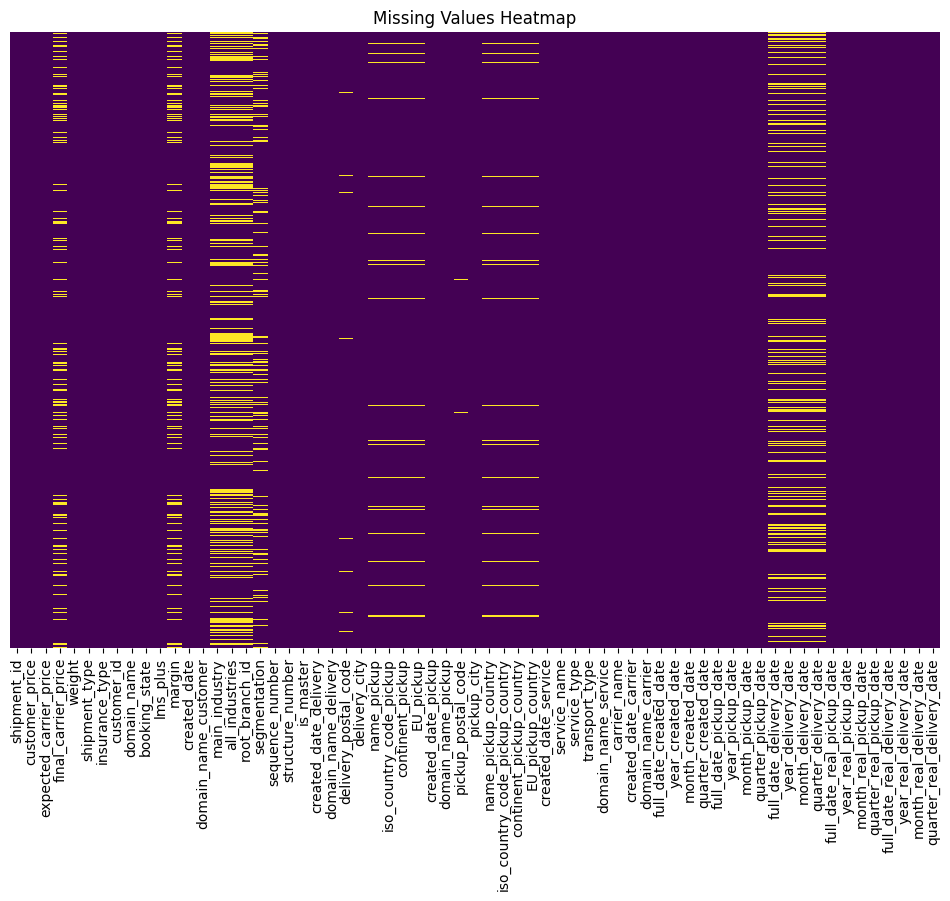

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

### Correlation Heatmap for Numerical Features

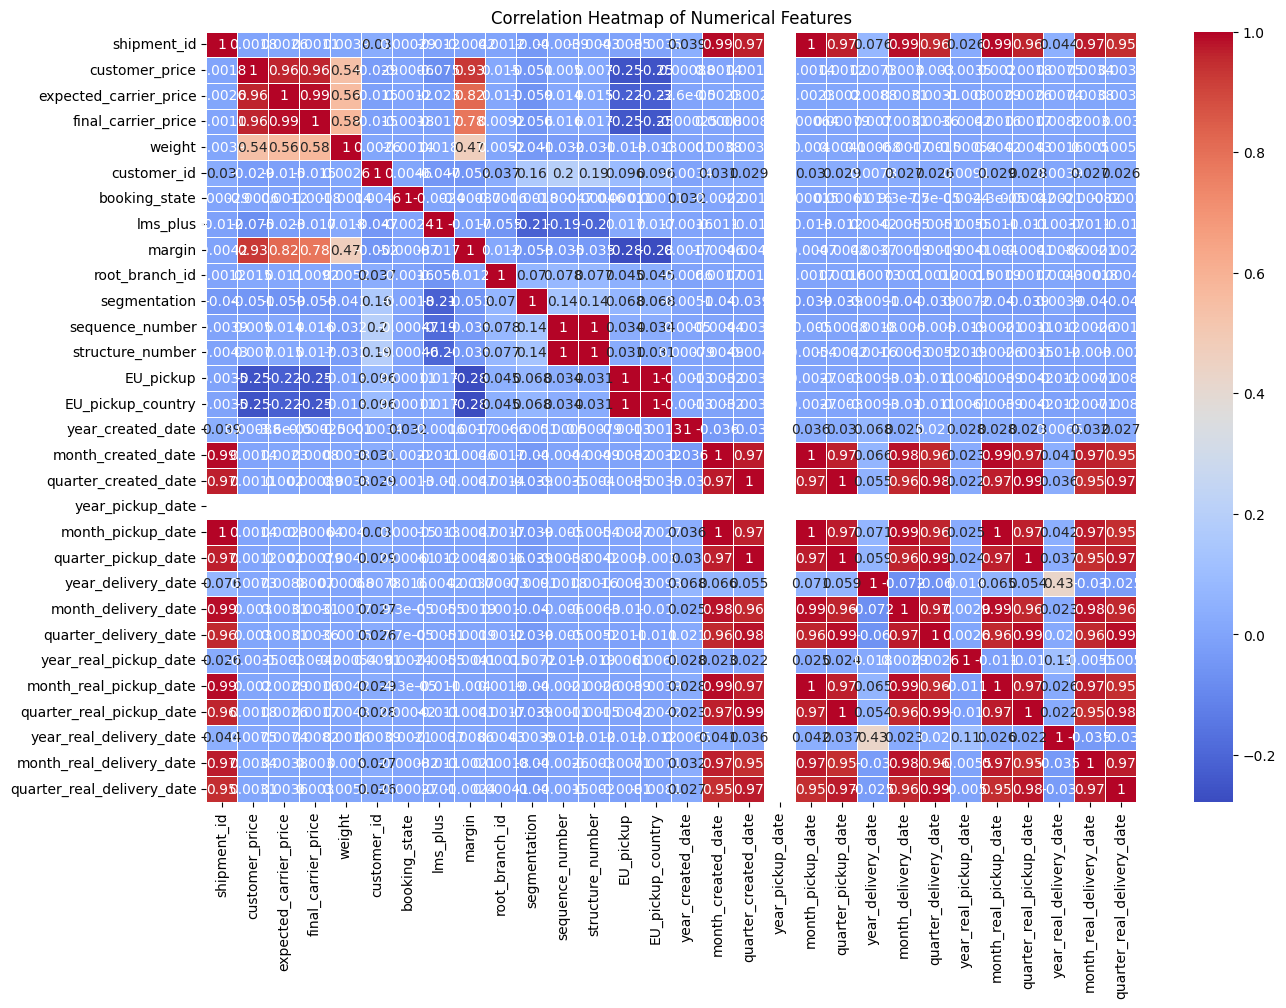

In [5]:
# Select only numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap for numerical features
plt.figure(figsize=(15, 10))
corr_matrix = numerical_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Visualizing Feature Distributions

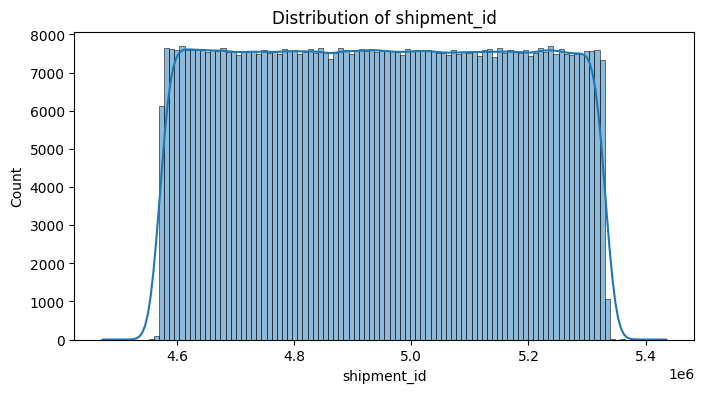

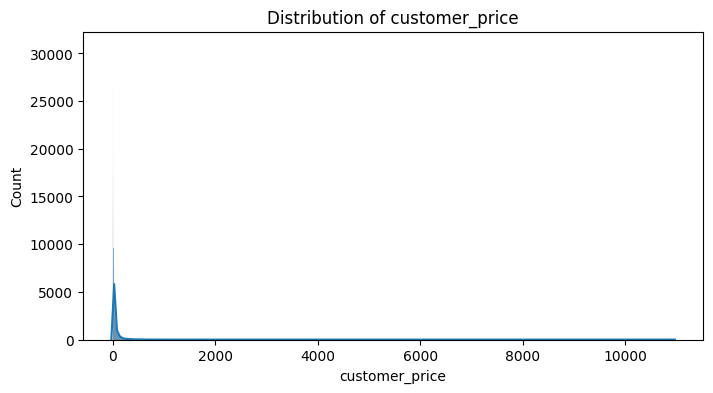

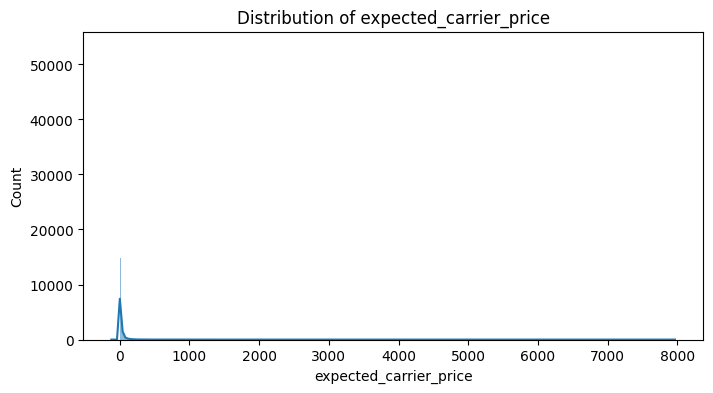

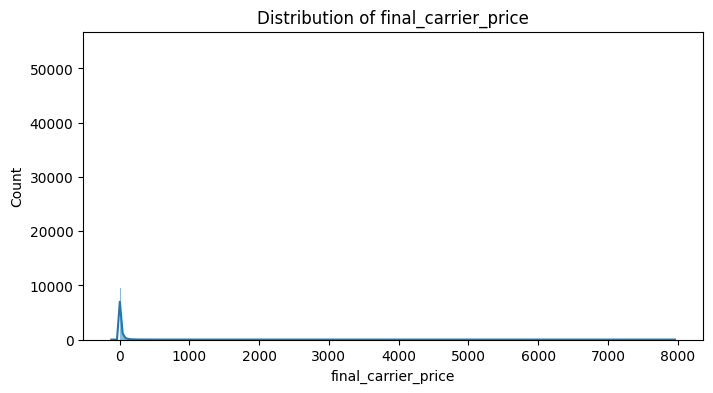

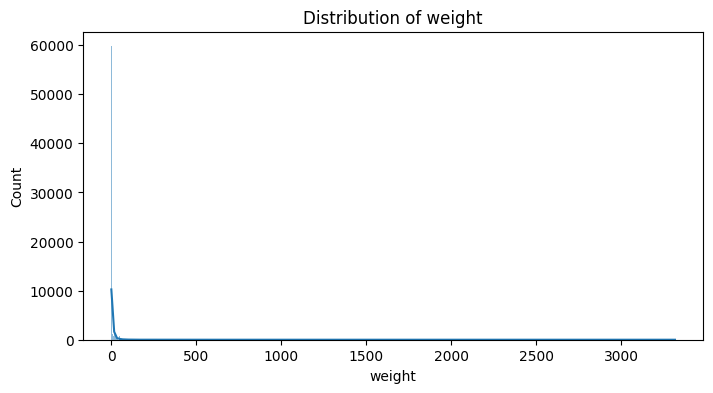

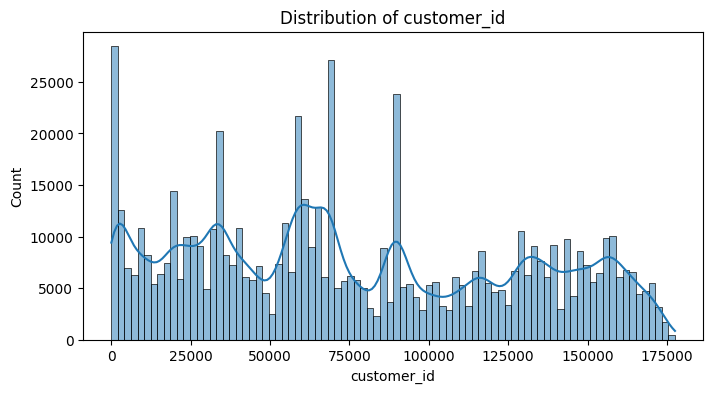

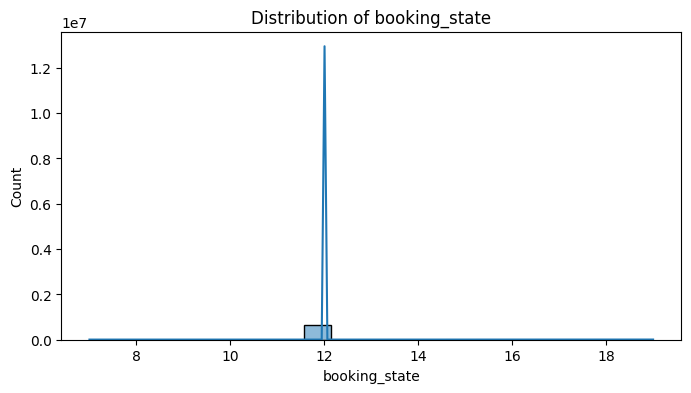

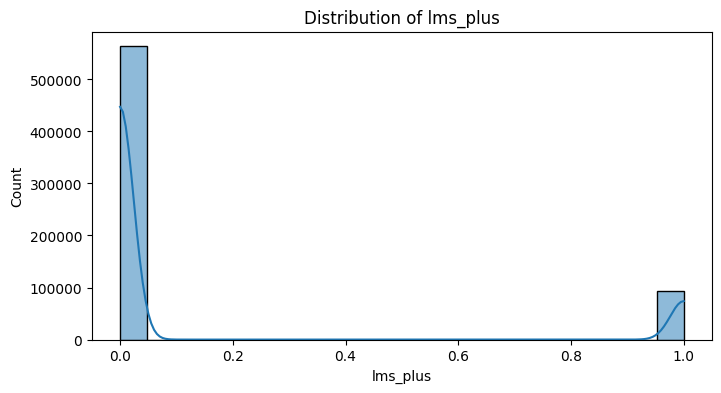

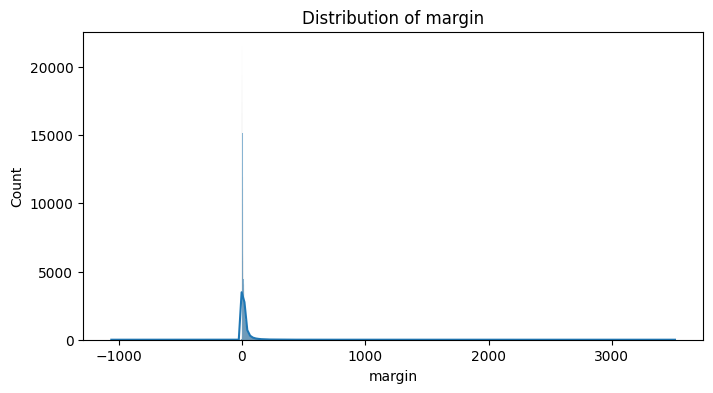

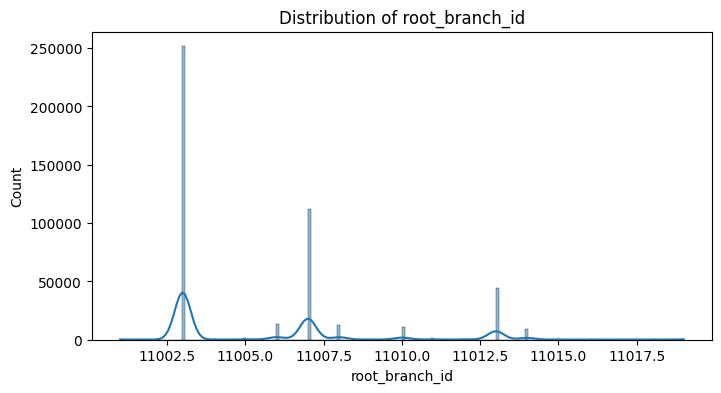

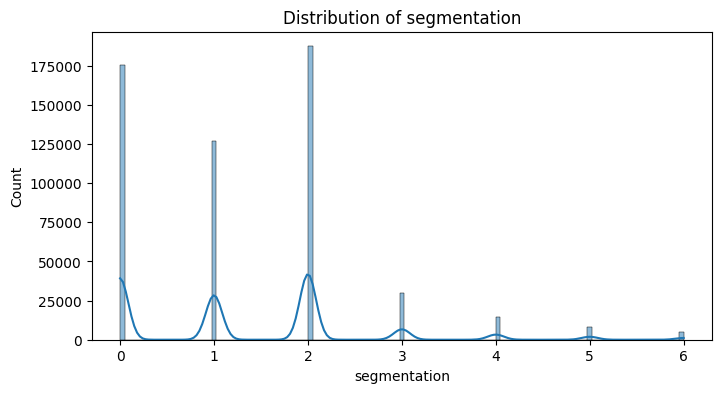

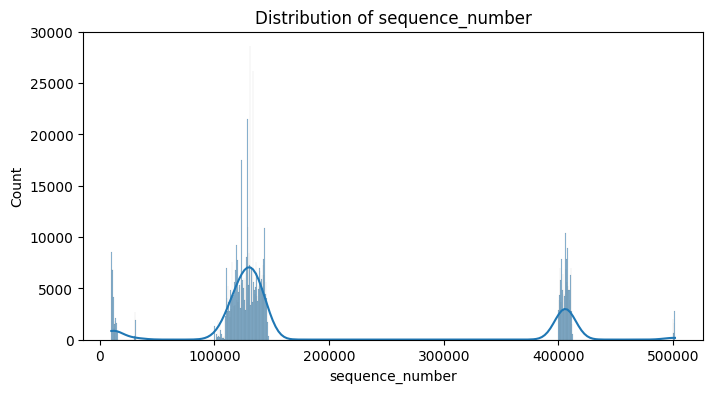

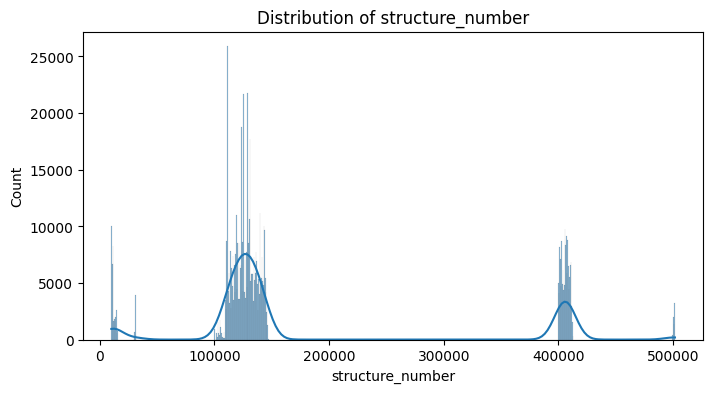

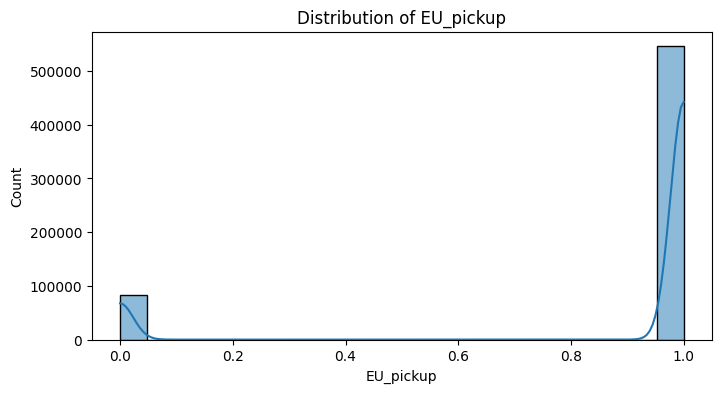

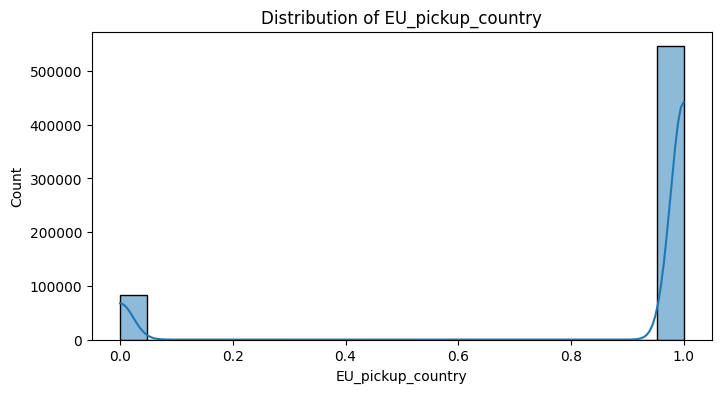

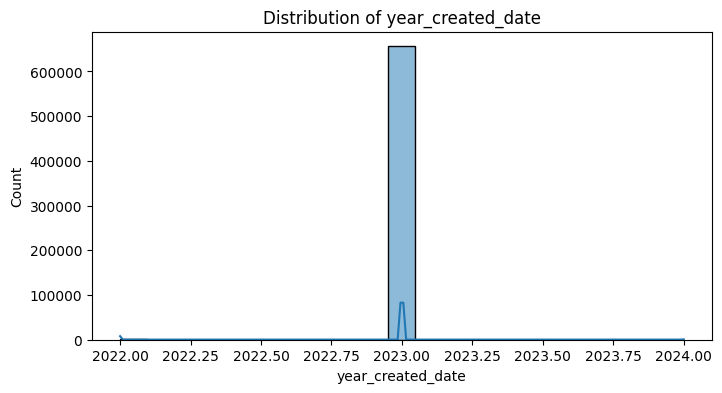

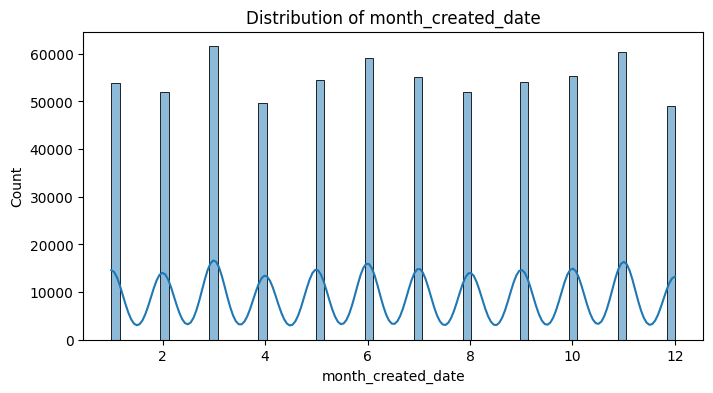

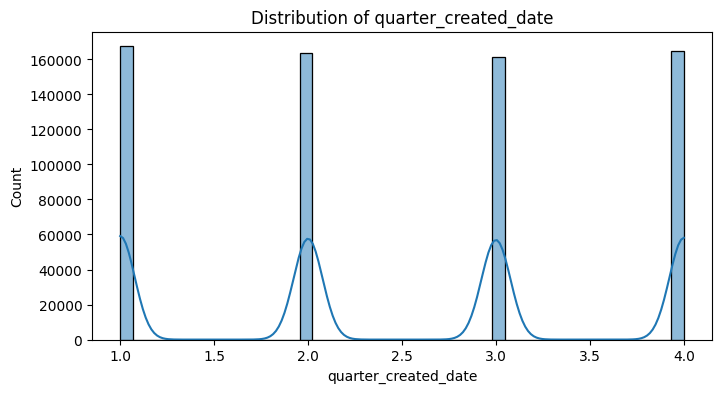

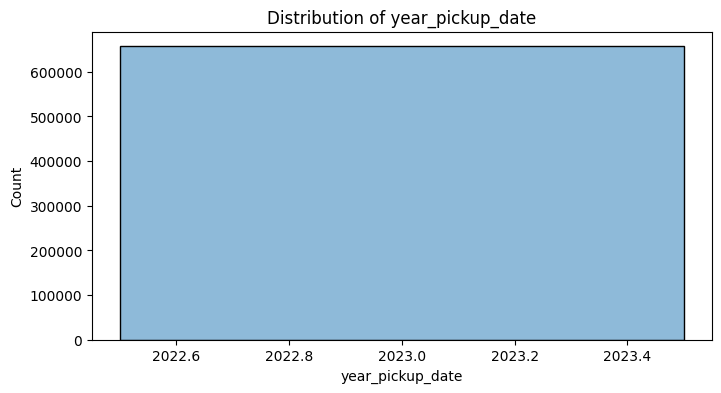

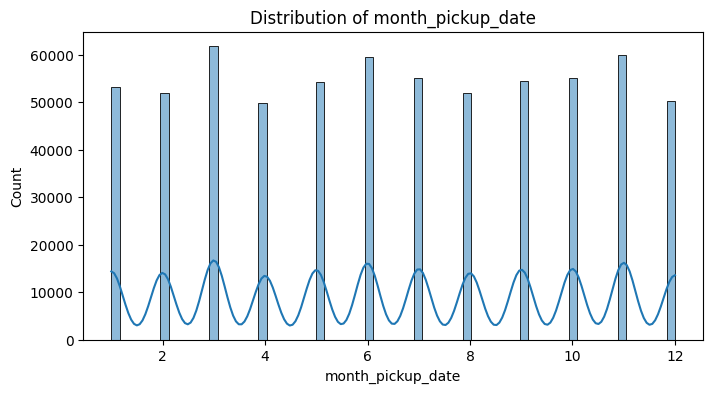

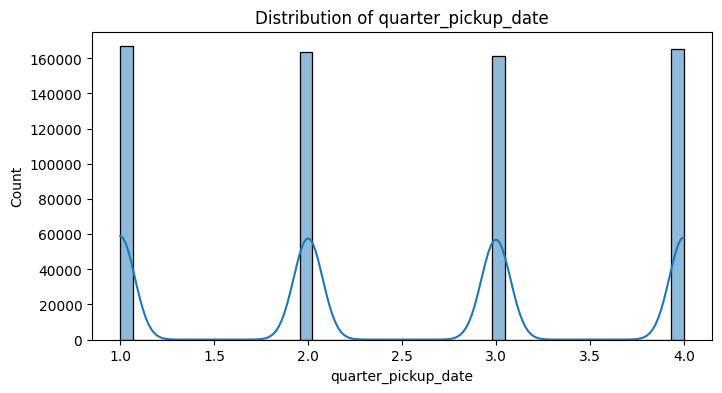

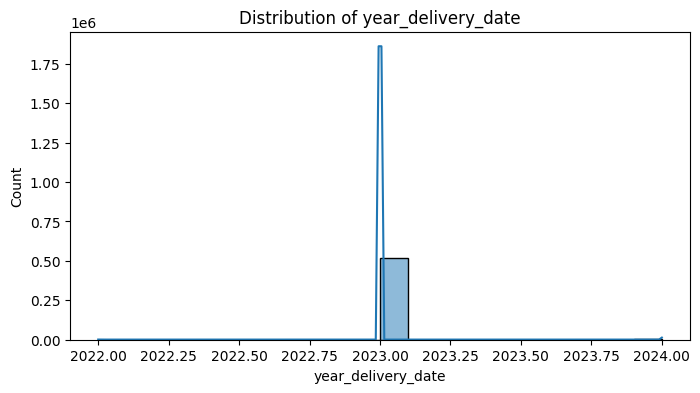

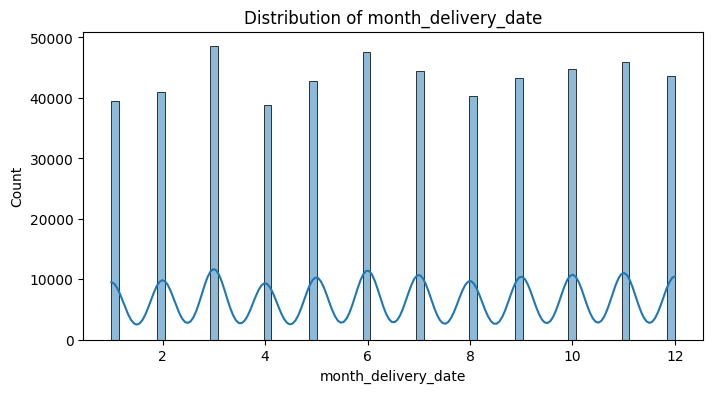

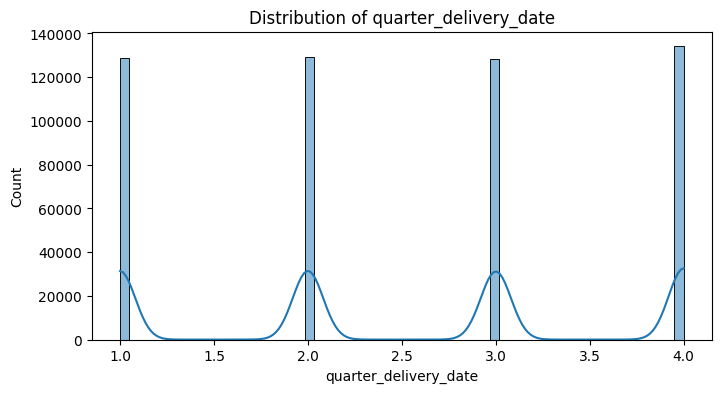

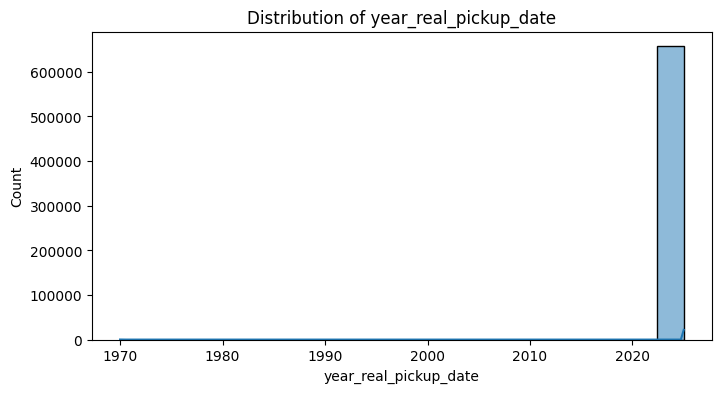

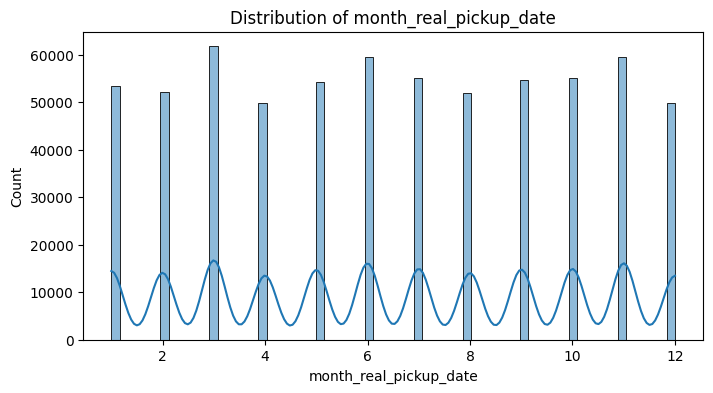

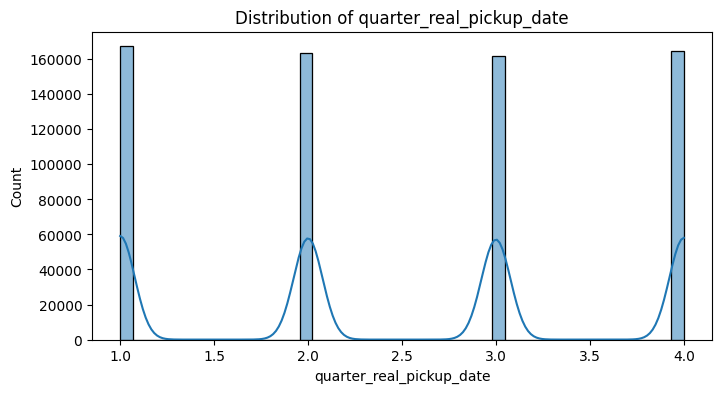

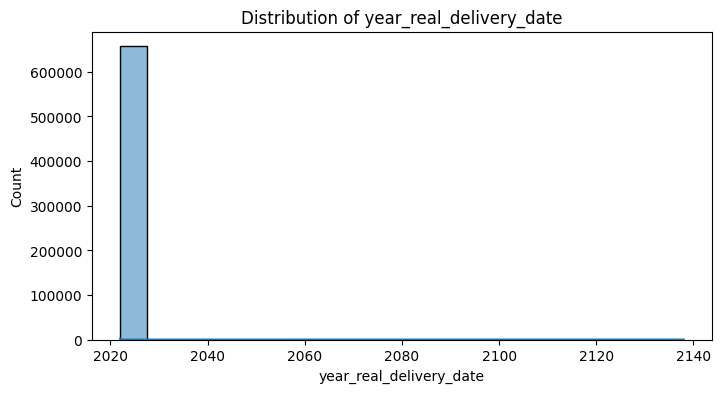

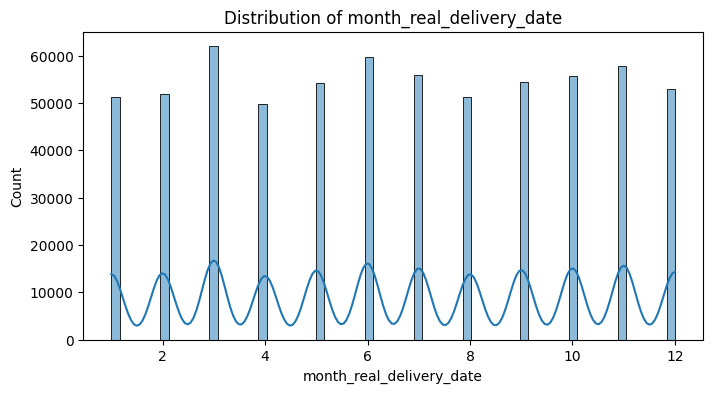

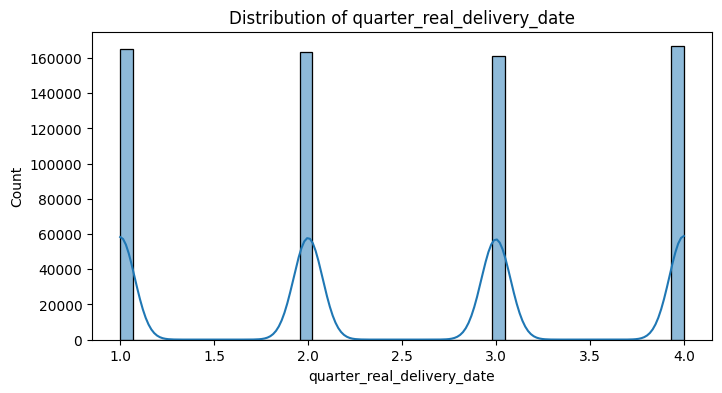

In [6]:
# Plot distribution for each numerical feature
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.show()


### Box Plots for Outlier Detection

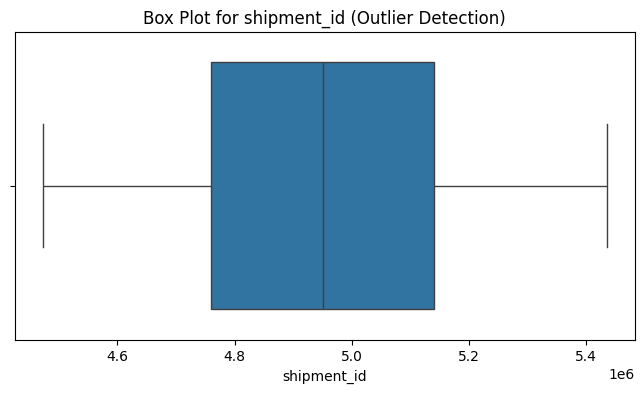

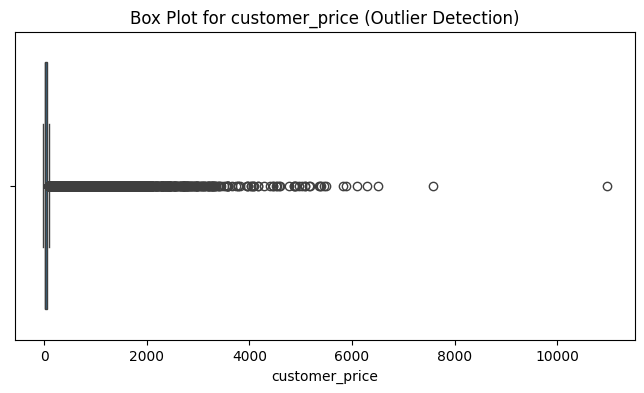

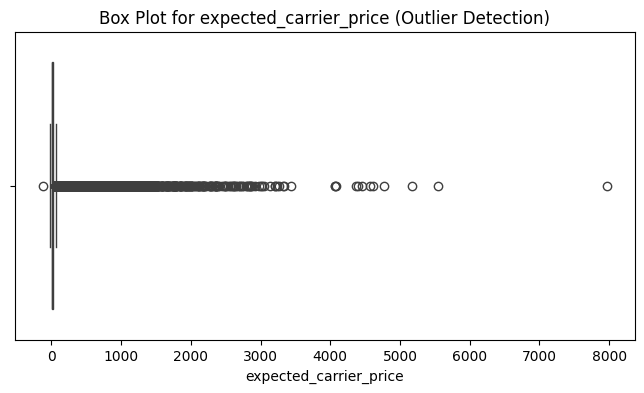

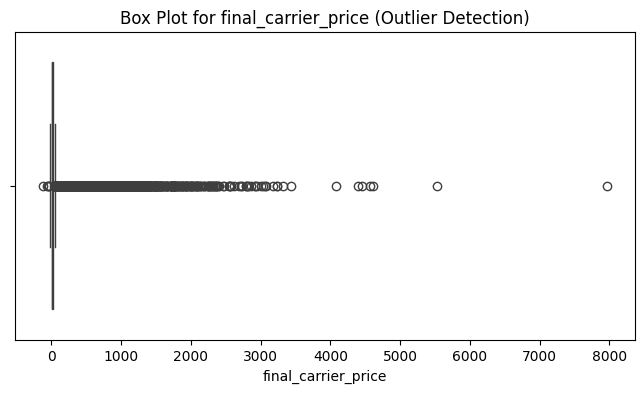

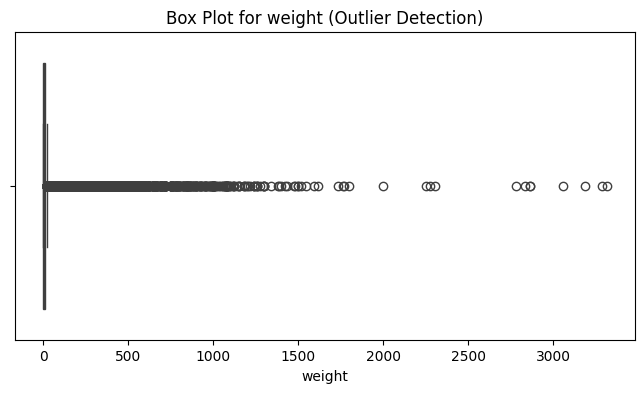

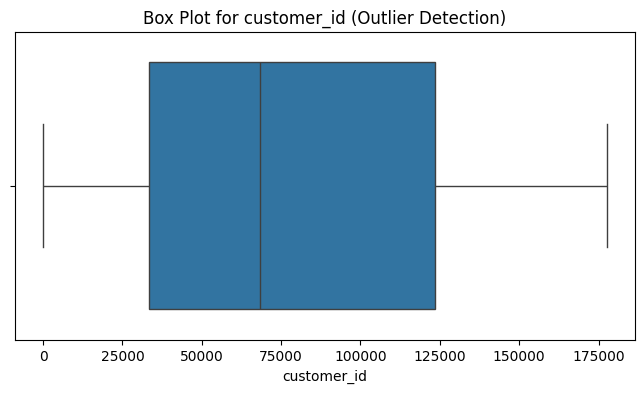

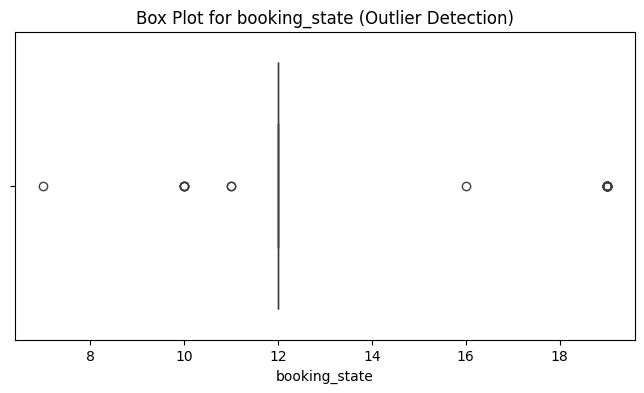

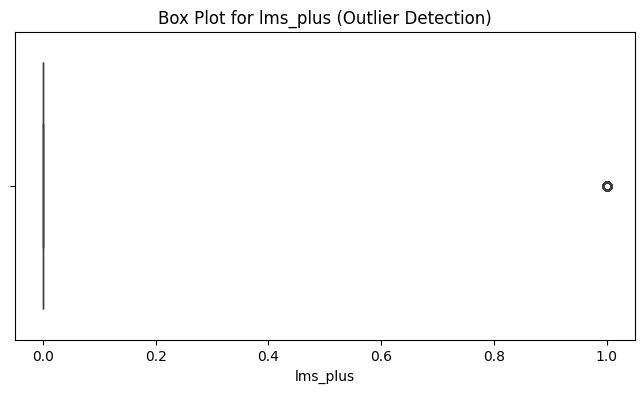

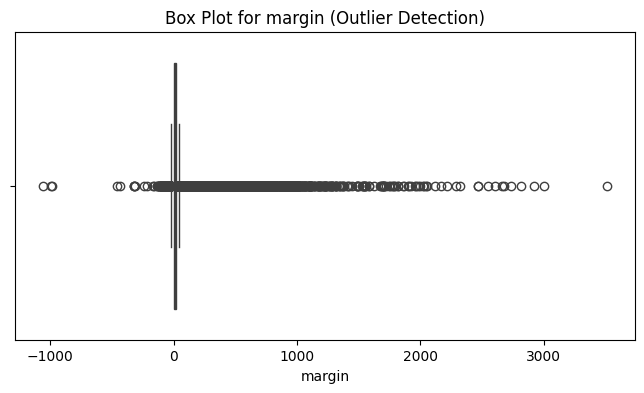

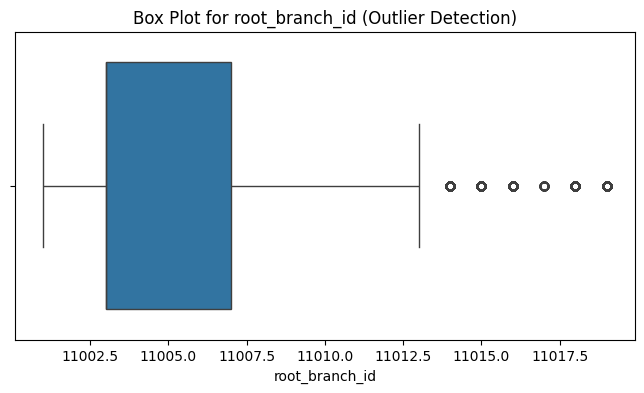

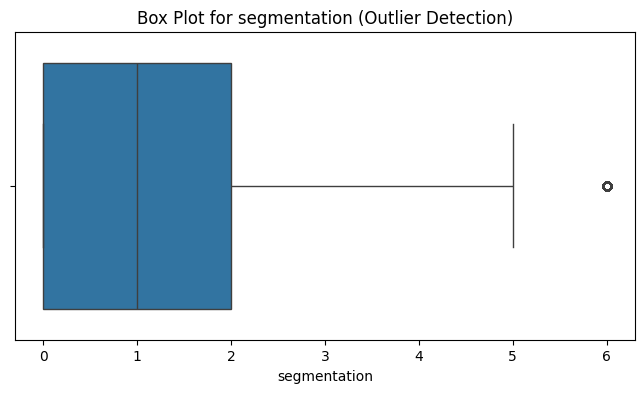

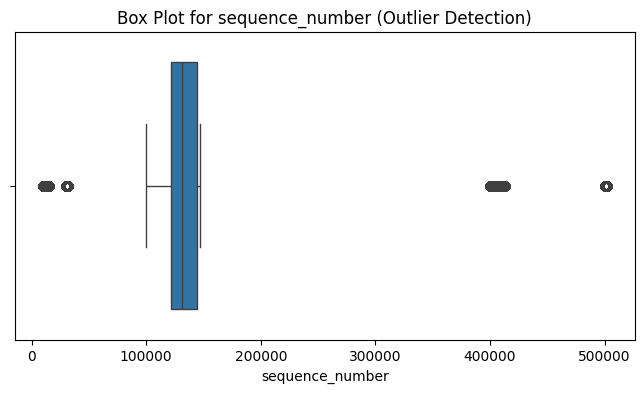

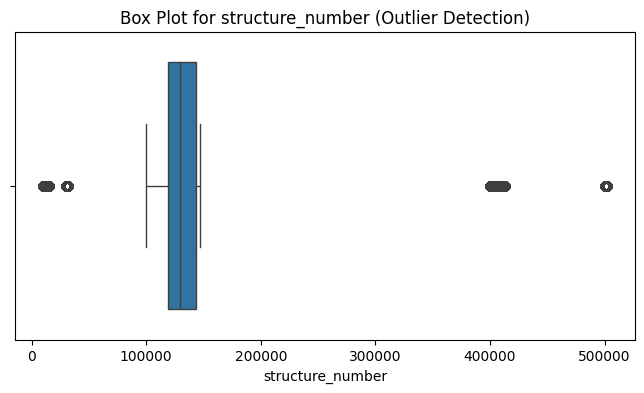

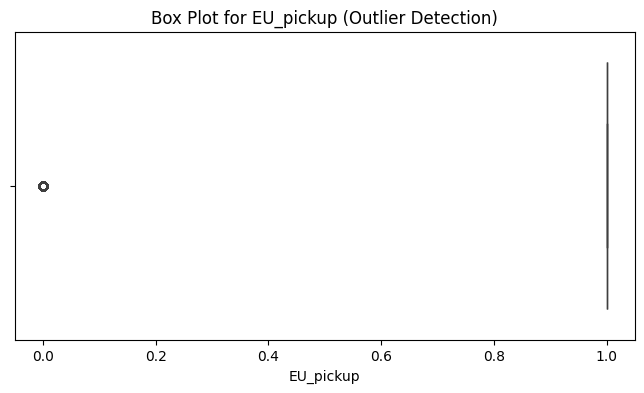

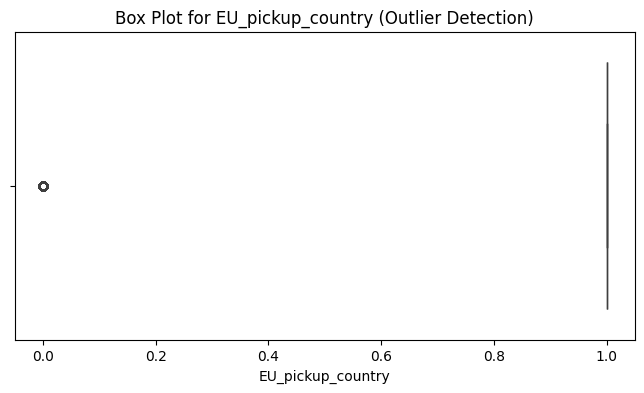

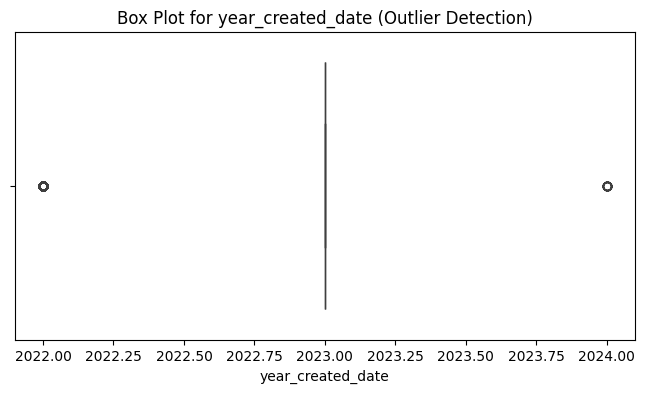

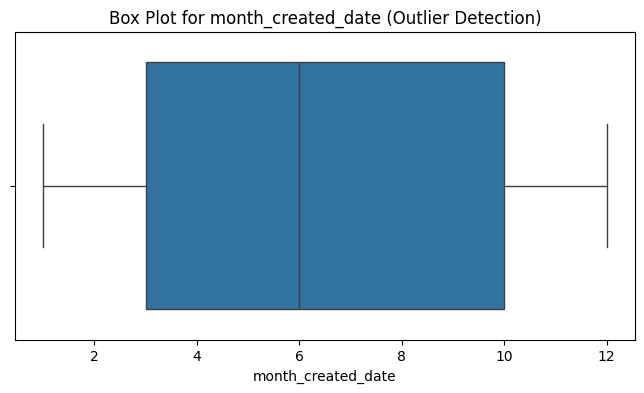

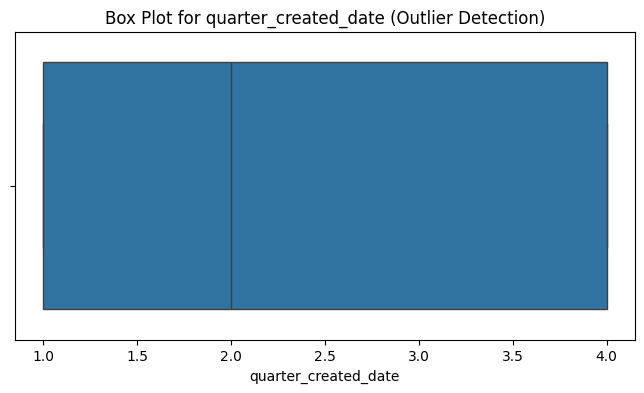

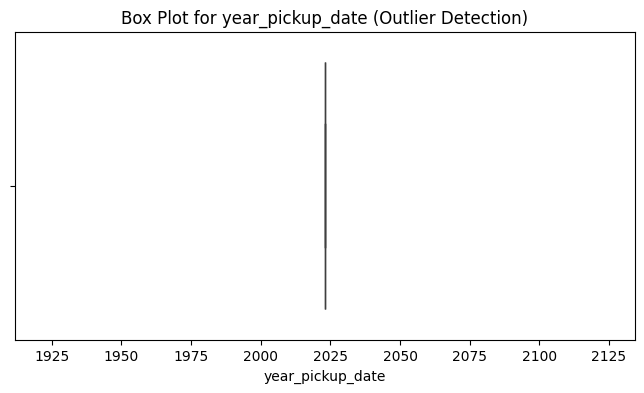

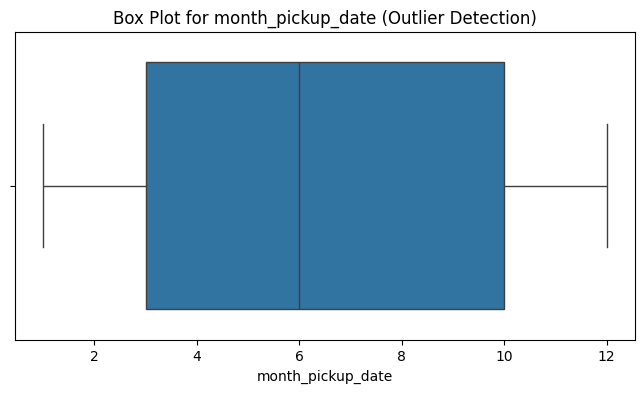

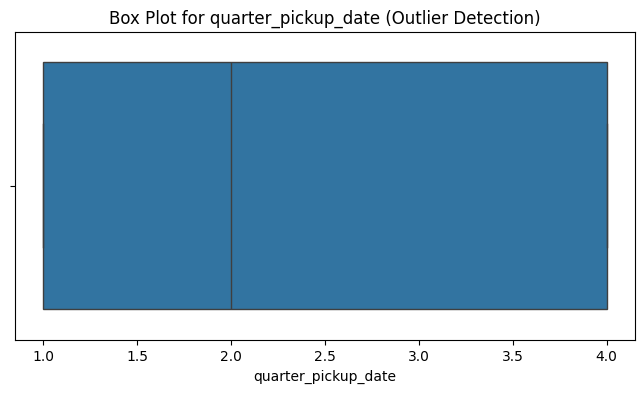

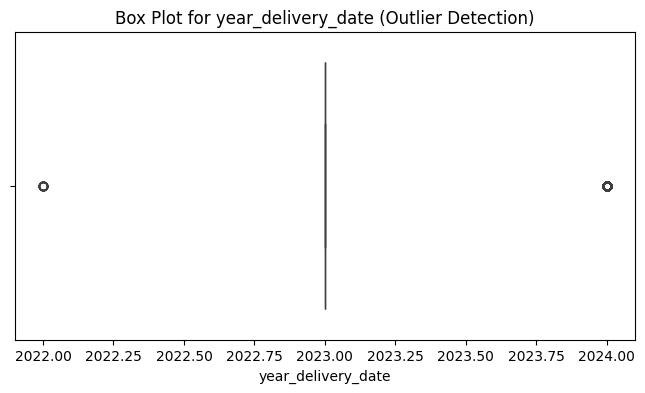

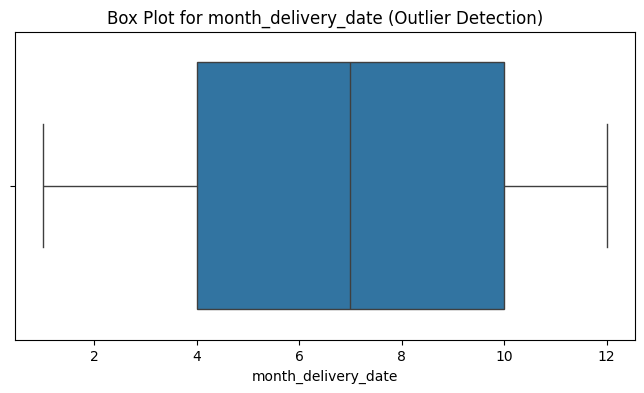

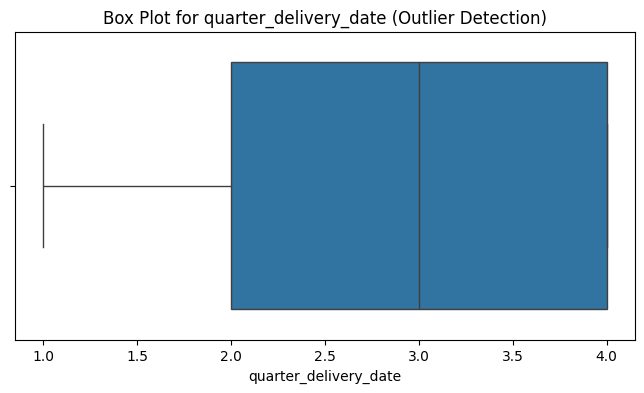

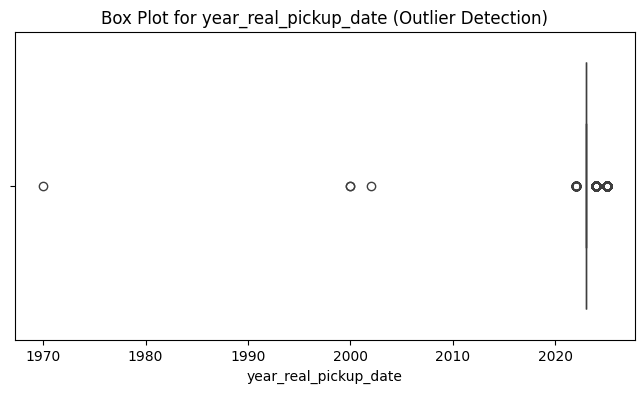

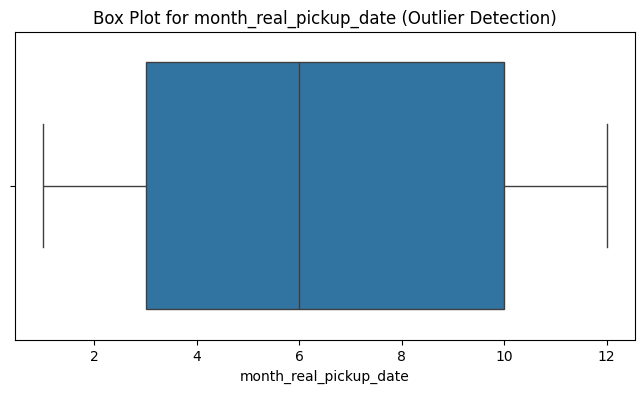

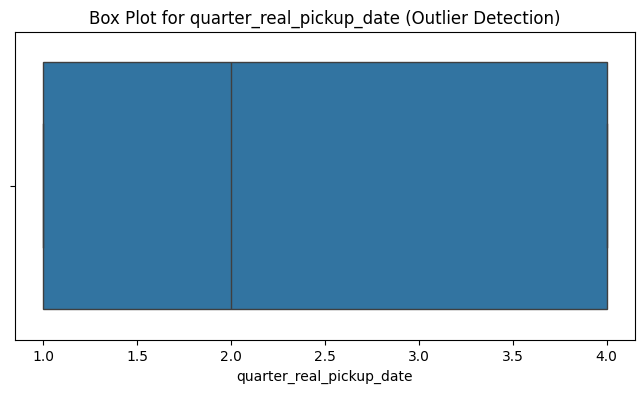

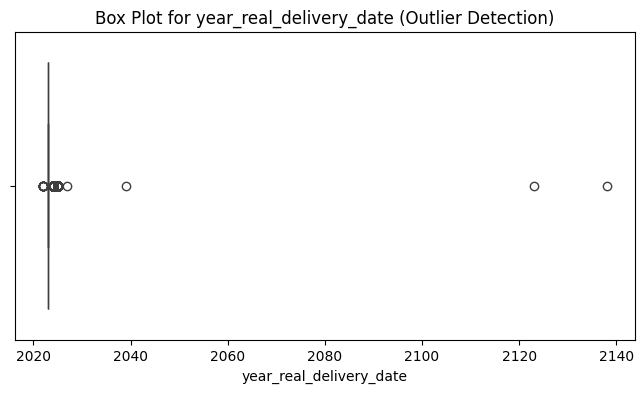

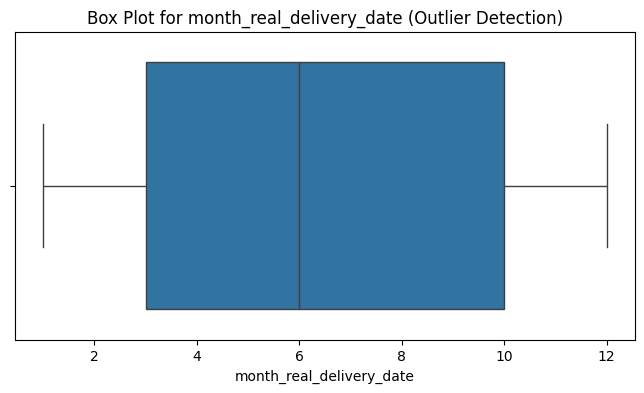

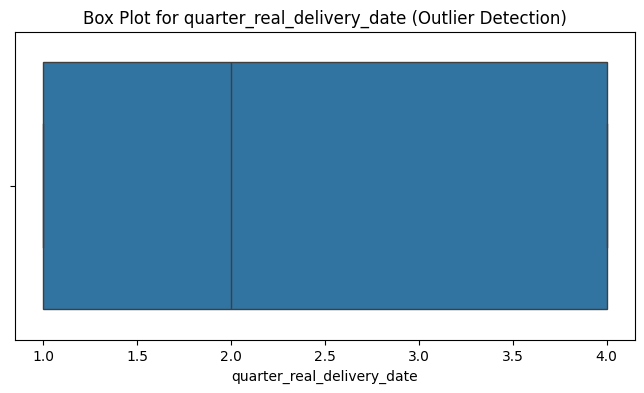

In [ ]:
# Box plot for outlier detection in each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Box Plot for {feature} (Outlier Detection)")
    plt.xlabel(feature)
    plt.show()


### Feature Interaction Plots

In [ ]:
# Pair plot for numerical features (downsample to avoid overload if data is large)
sampled_data = df.sample(5000)  # Sample a subset to avoid overloading the plot
sns.pairplot(sampled_data[numerical_features])
plt.show()

### Target Variable Analysis

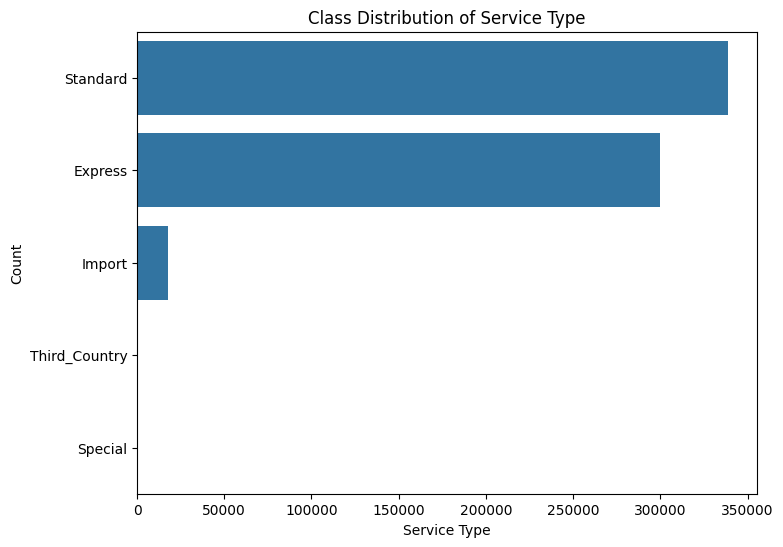

In [ ]:
# Plotting the class distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(df['service_type'])
plt.title("Class Distribution of Service Type")
plt.xlabel("Service Type")
plt.ylabel("Count")
plt.show()

### Feature Importance Analysis (initial)

This code crashes since it performes "get_dummies". Change it as the next one

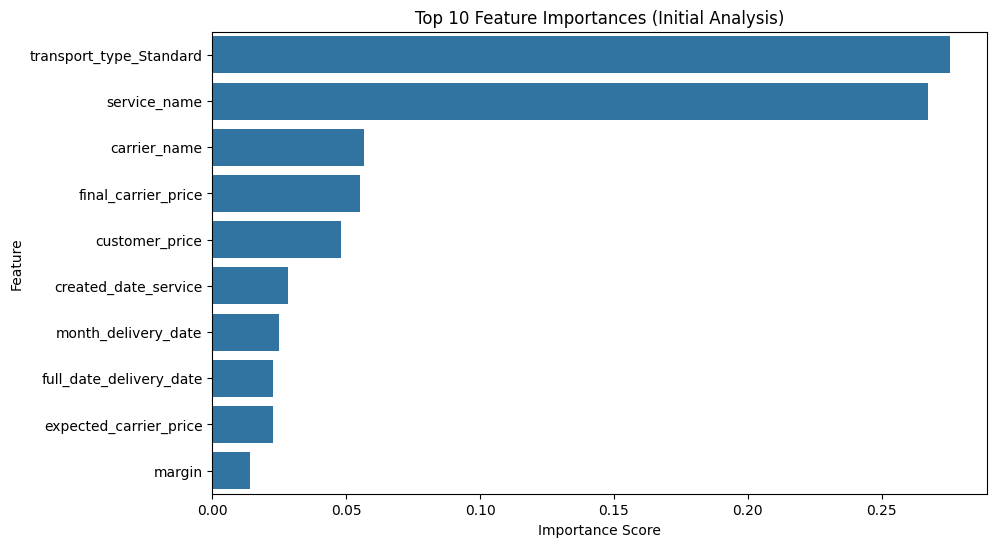

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Downsample the data to avoid memory overload
df_sampled = df.sample(frac=0.1, random_state=42)  # Use only 10% of the data

# Separate the target column before any transformations
target_column = 'service_type'
y = df_sampled[target_column]

# Drop the target column from the feature set
X = df_sampled.drop(columns=[target_column])

# Split numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Handle categorical columns
for col in categorical_cols:
    if X[col].nunique() > 10:  # High cardinality threshold (e.g., > 10 unique values)
        # Apply Label Encoding for high-cardinality features
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
    else:
        # Apply One-Hot Encoding for low-cardinality features
        X = pd.get_dummies(X, columns=[col], drop_first=True)

# Encode categorical target column if not already encoded
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)

# Train a RandomForestClassifier for feature importance analysis
rf = RandomForestClassifier(n_estimators=20, random_state=42)  # Reduced number of estimators to limit memory usage
rf.fit(X, y)

# Plot feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Top 10 Feature Importances (Initial Analysis)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

### Correlation with Target Variable

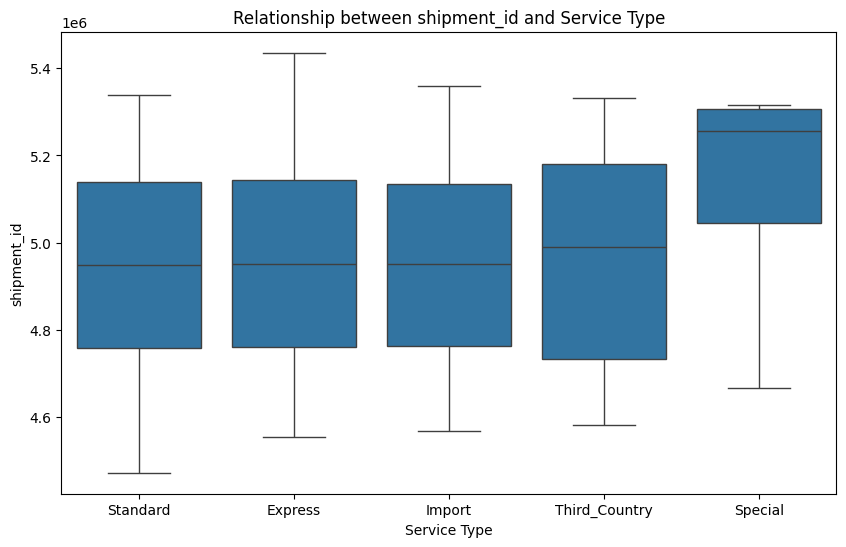

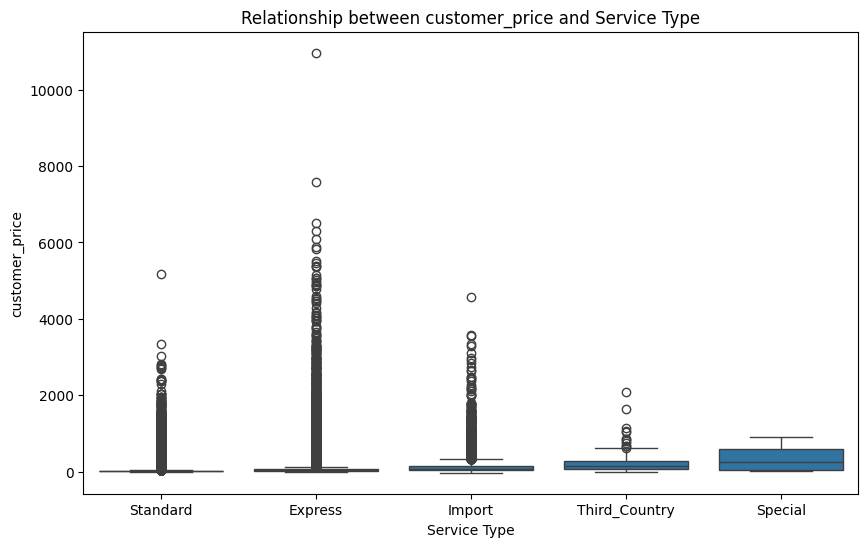

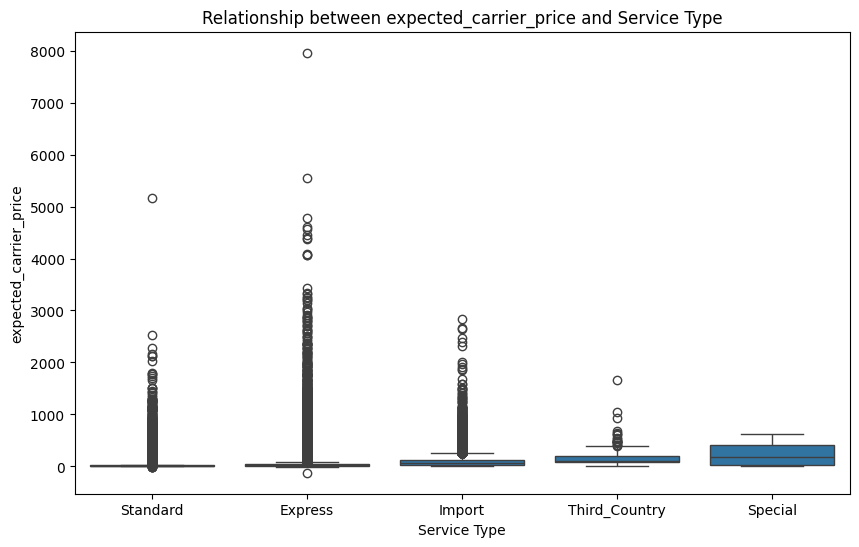

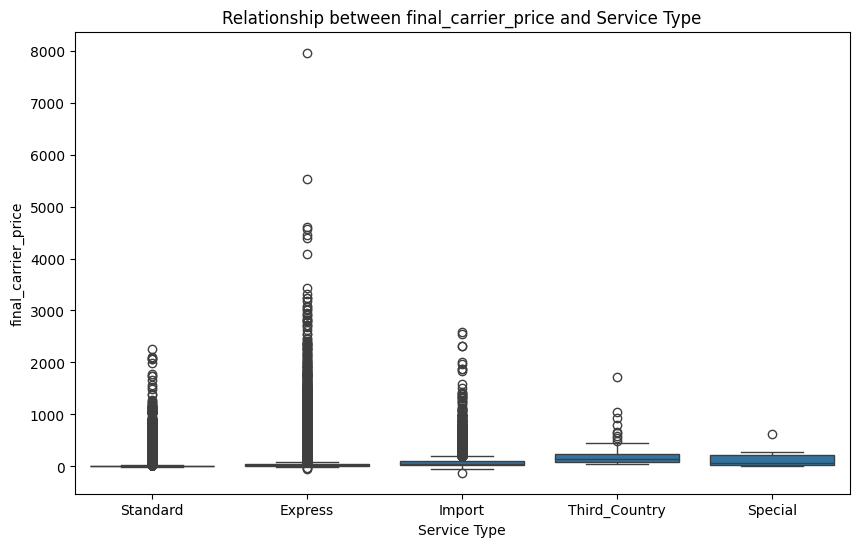

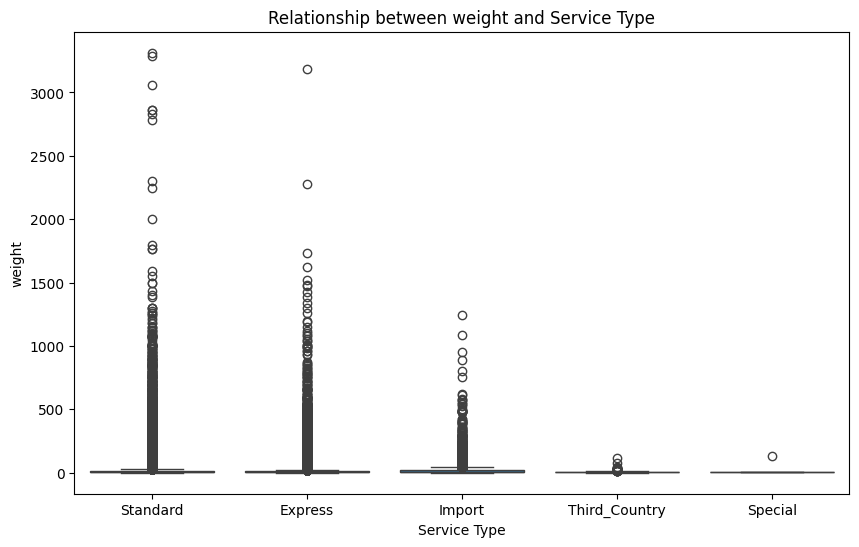

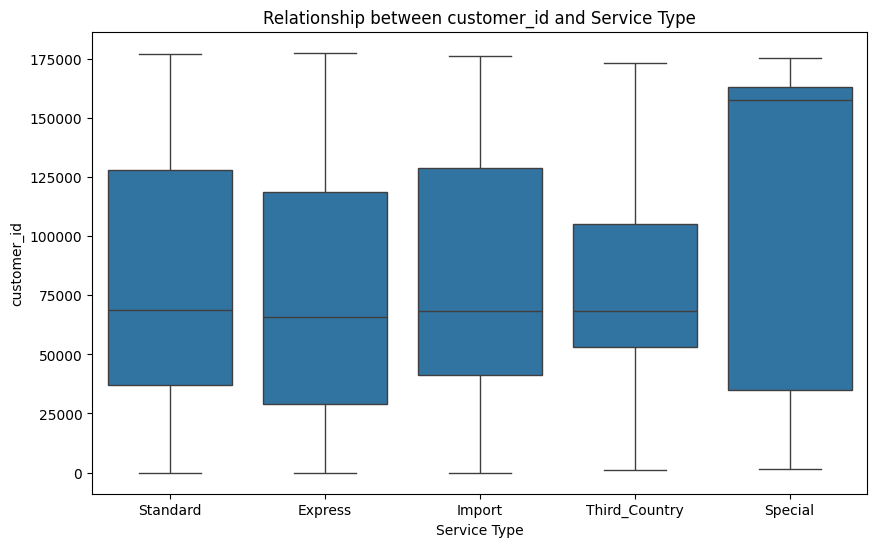

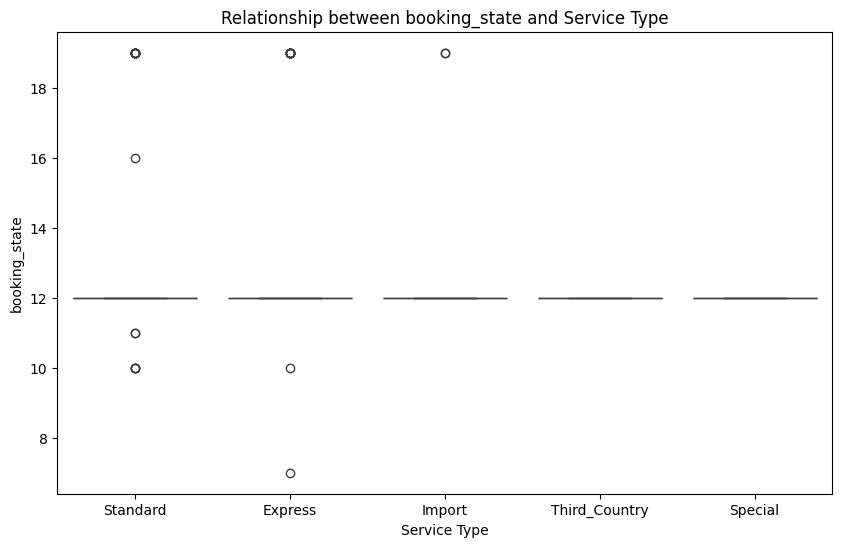

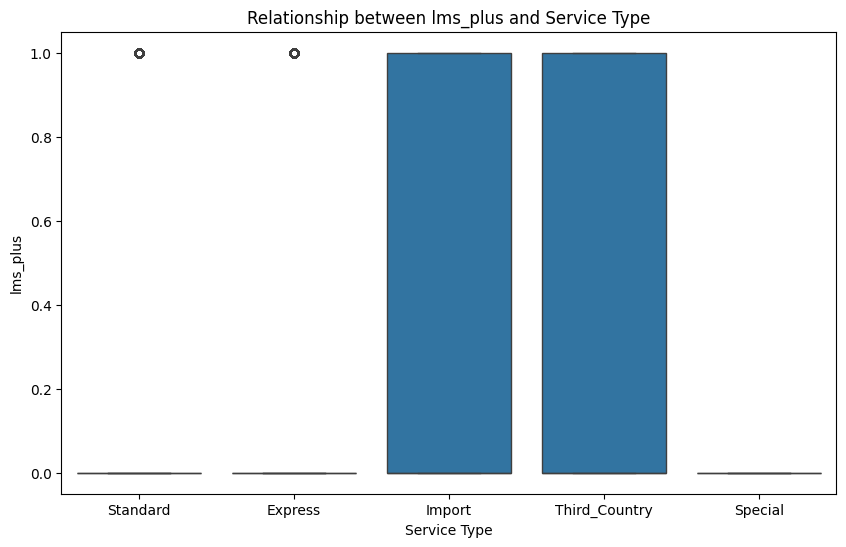

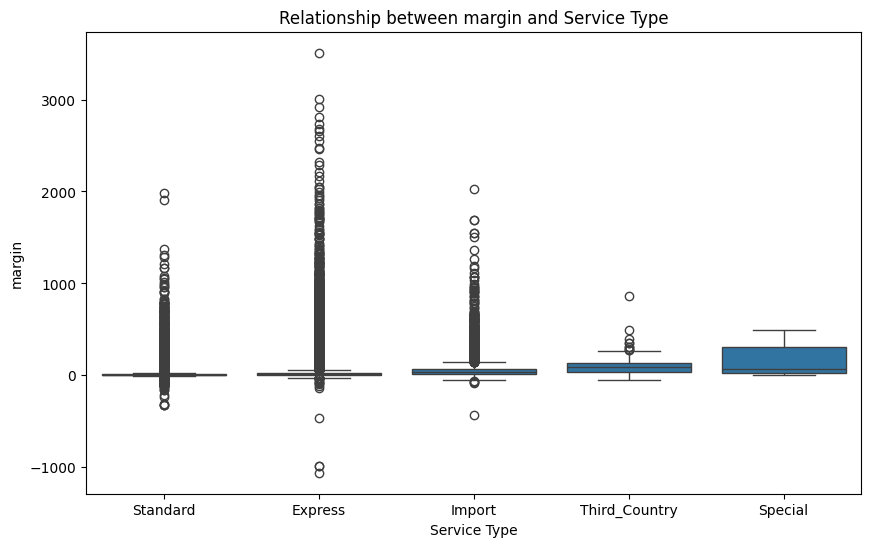

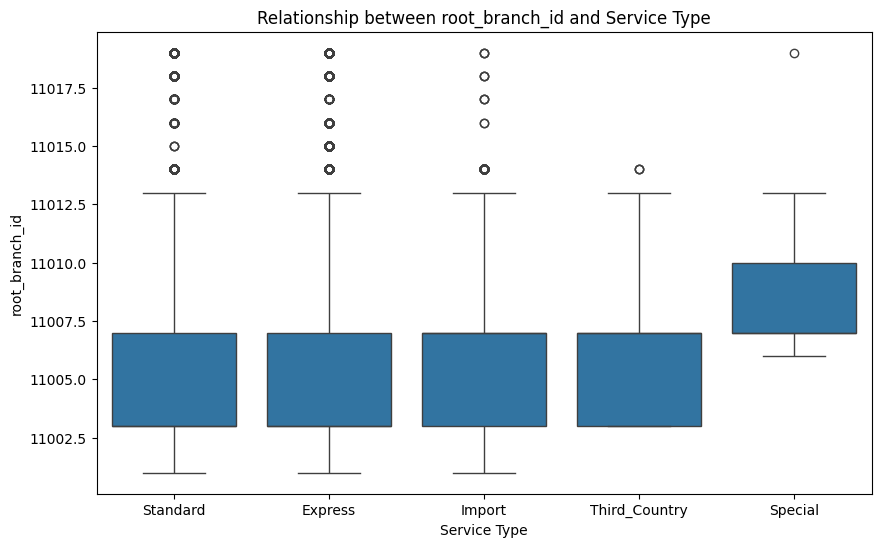

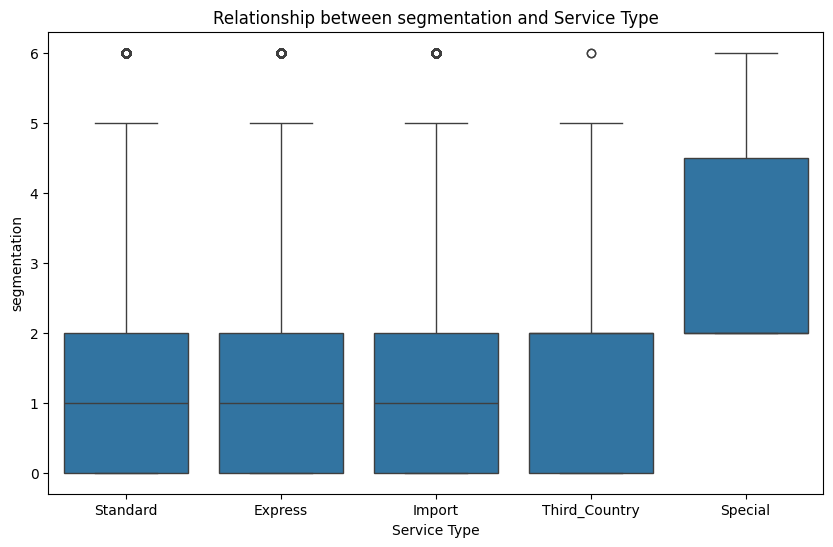

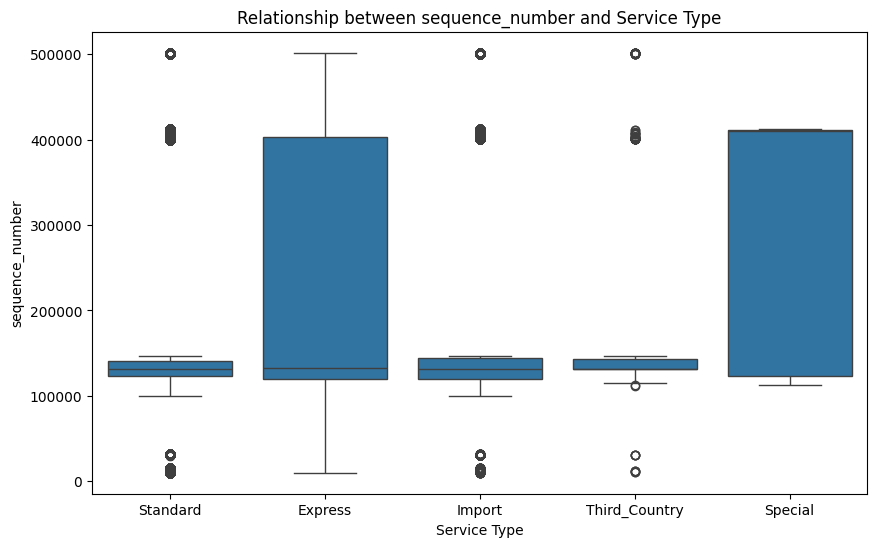

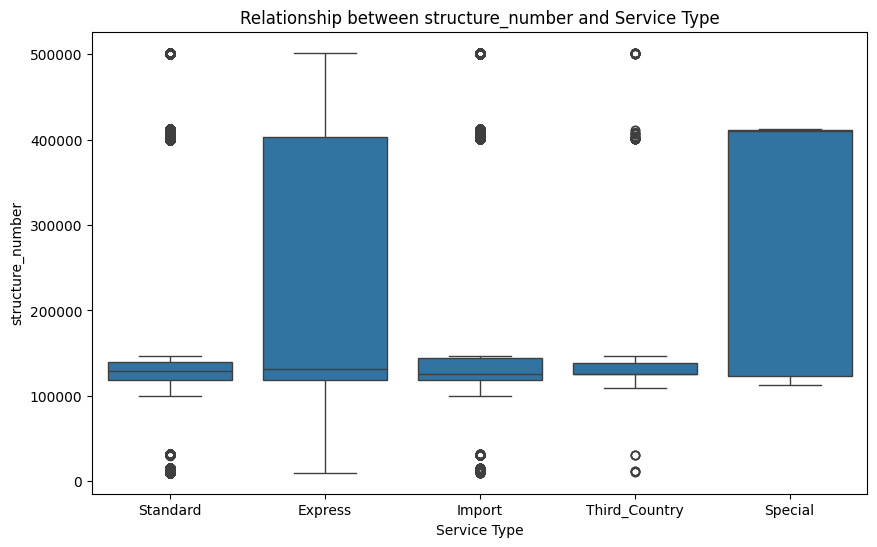

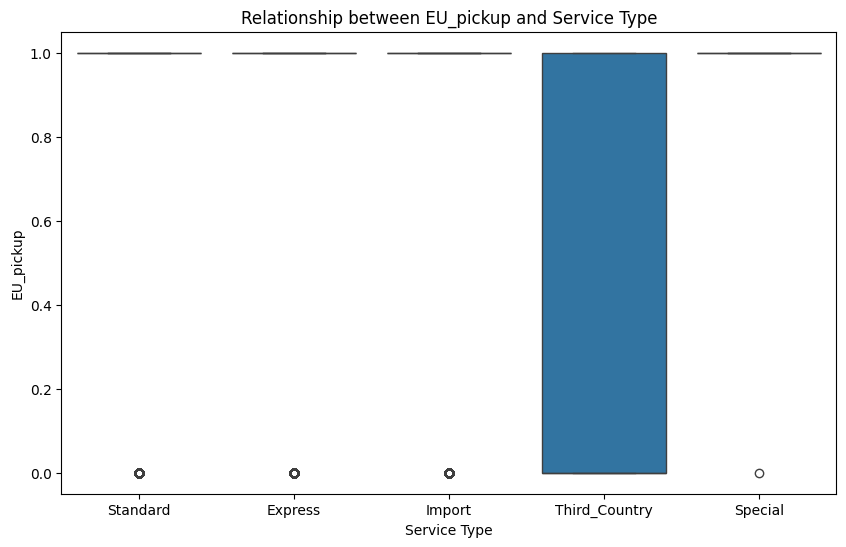

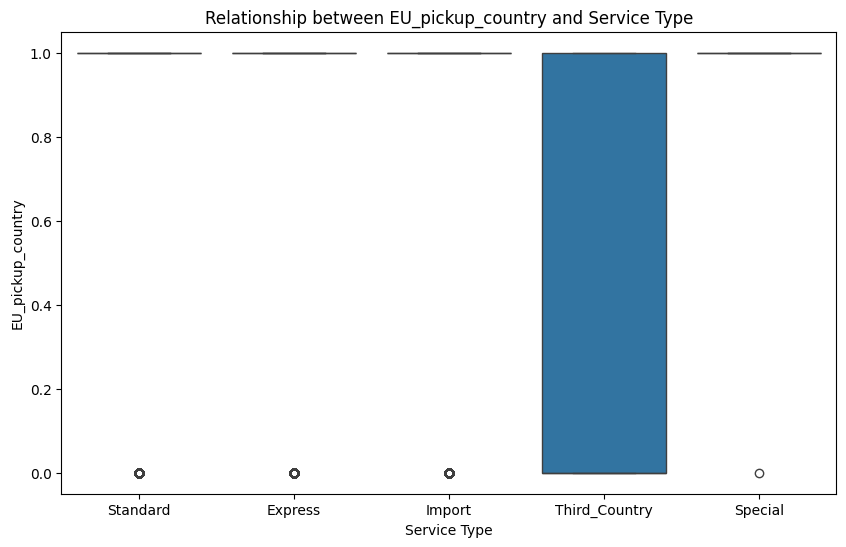

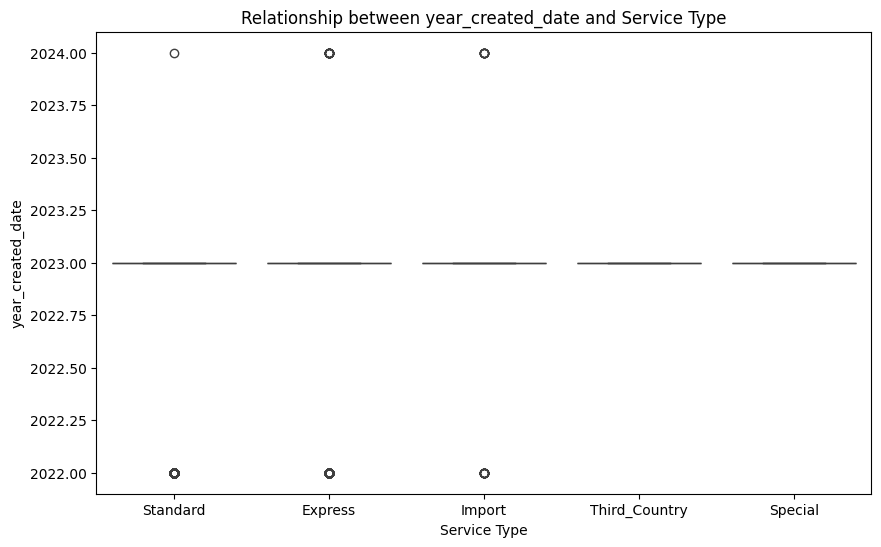

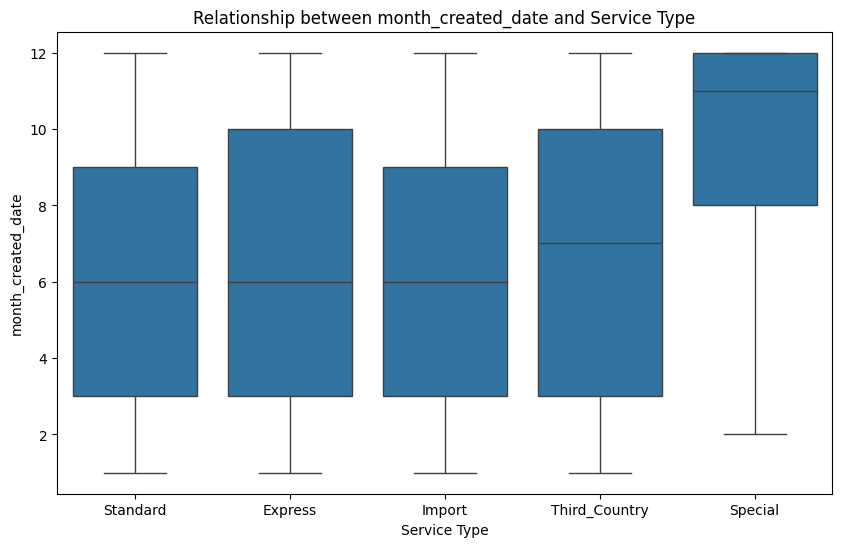

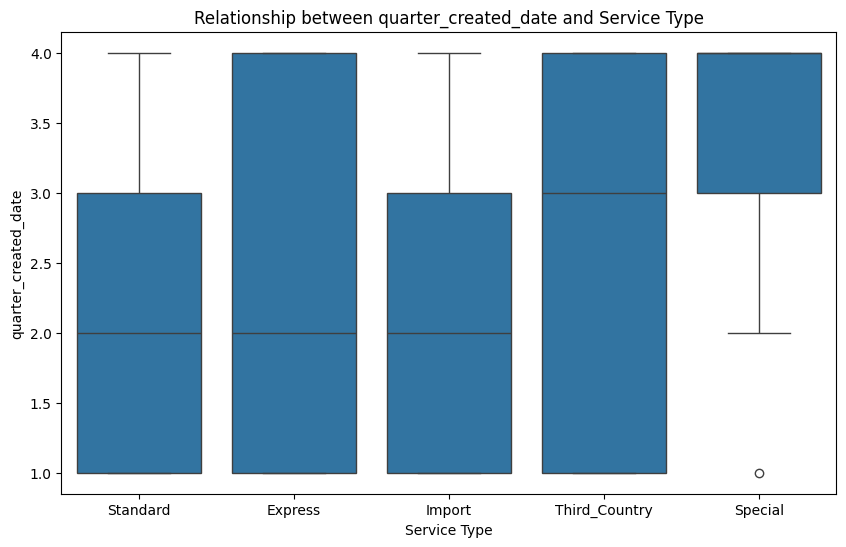

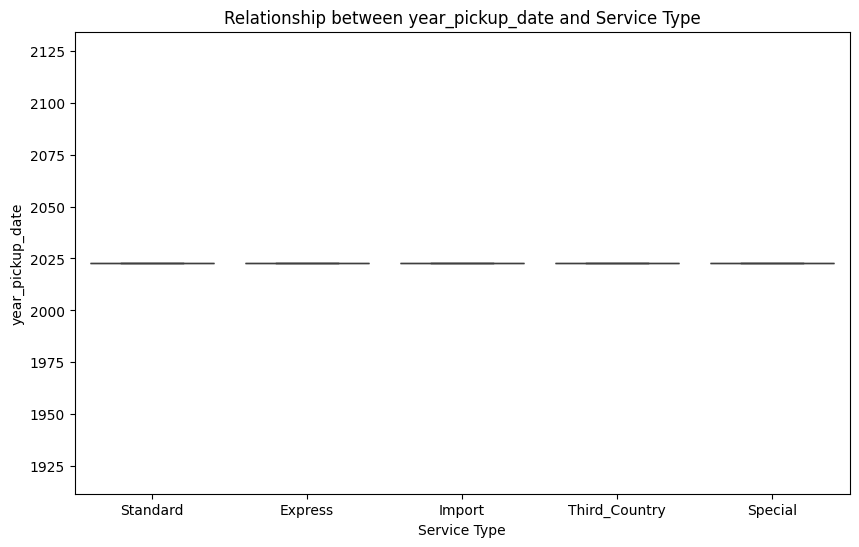

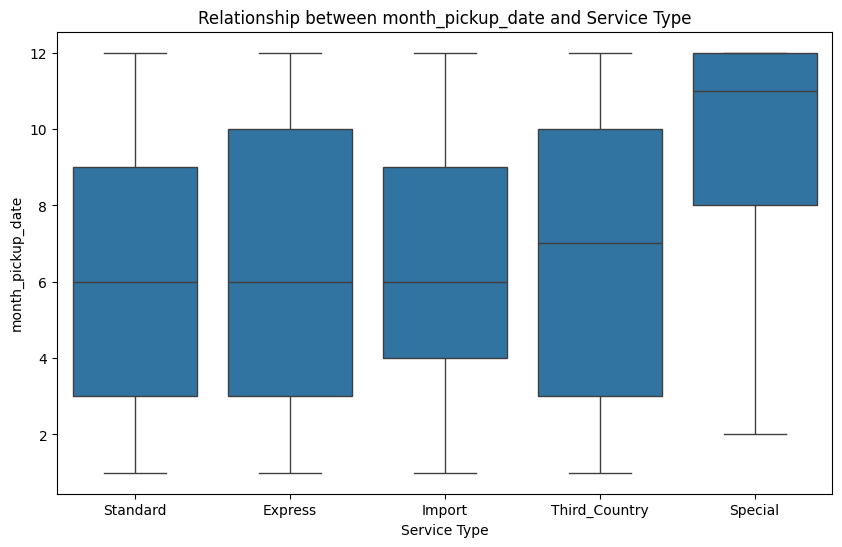

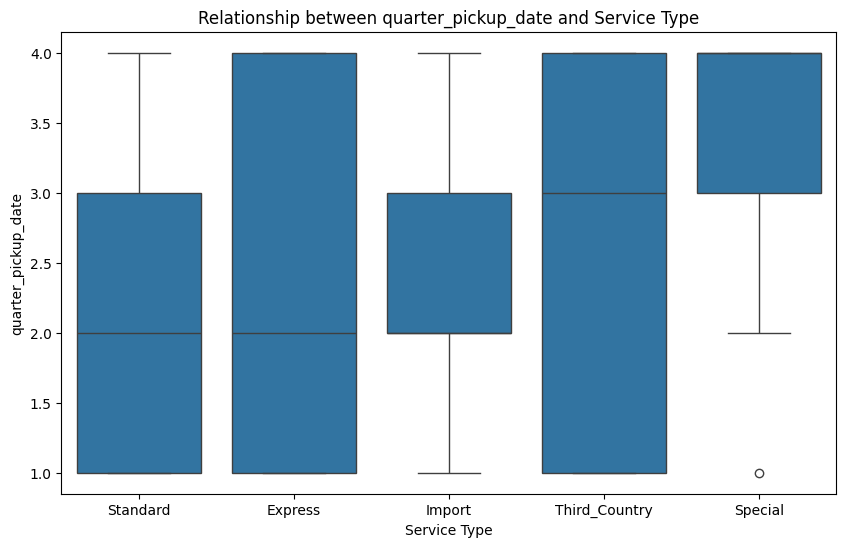

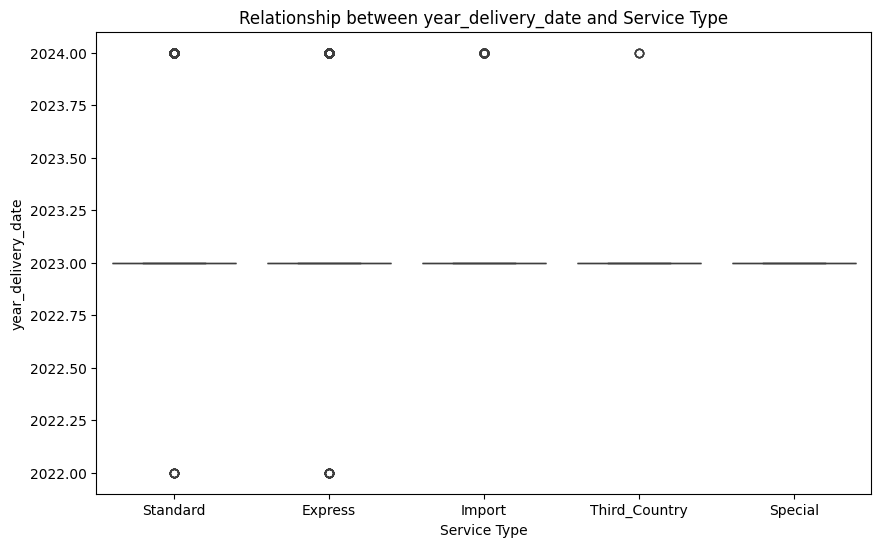

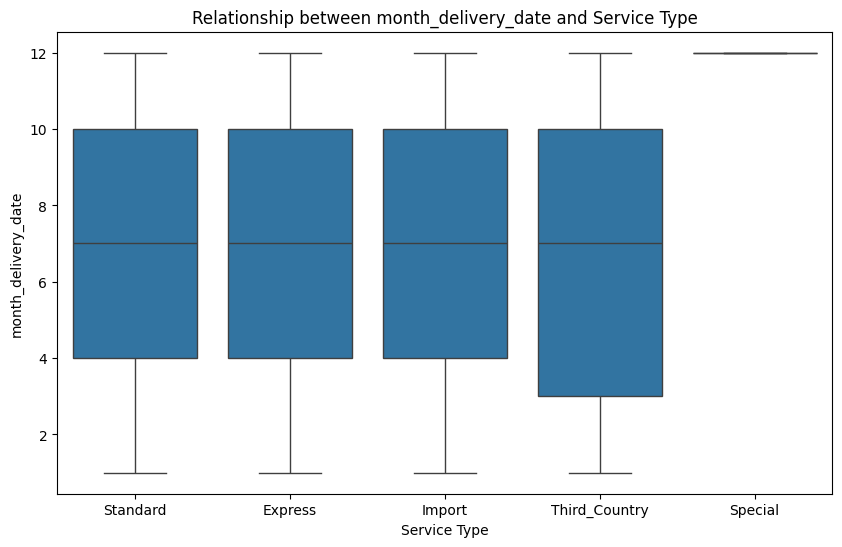

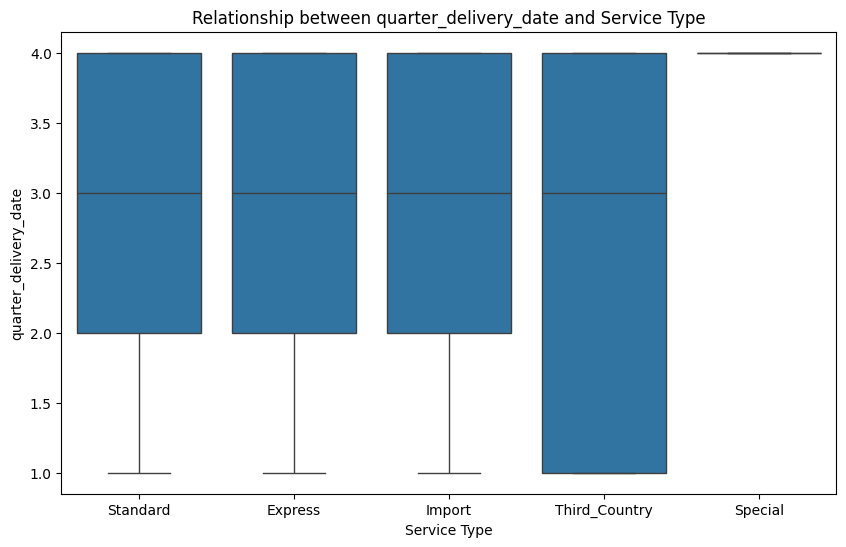

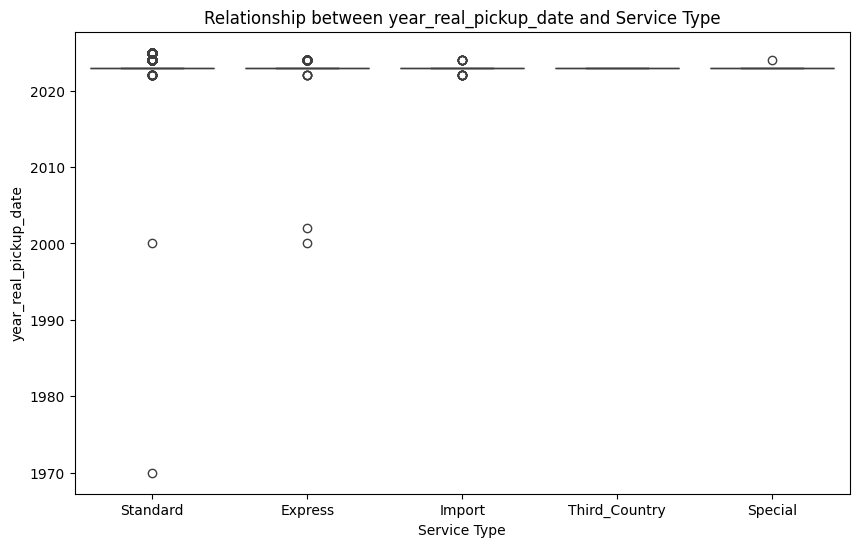

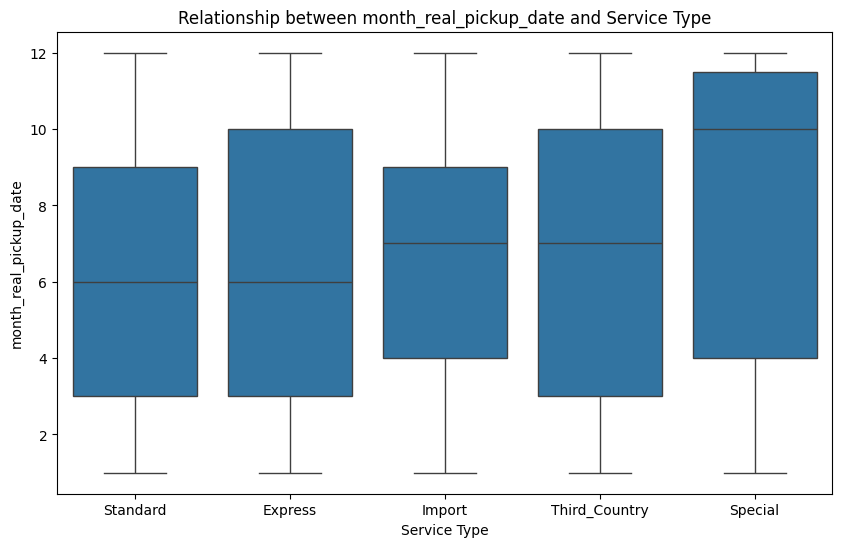

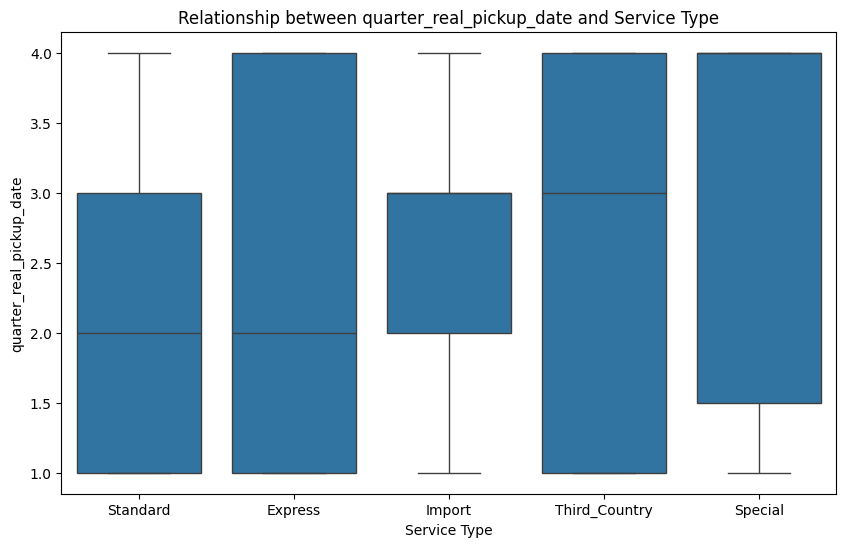

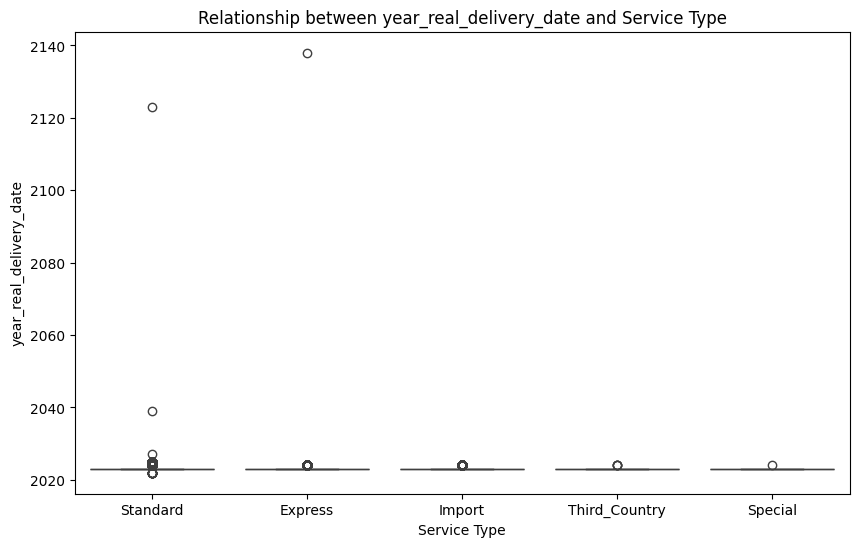

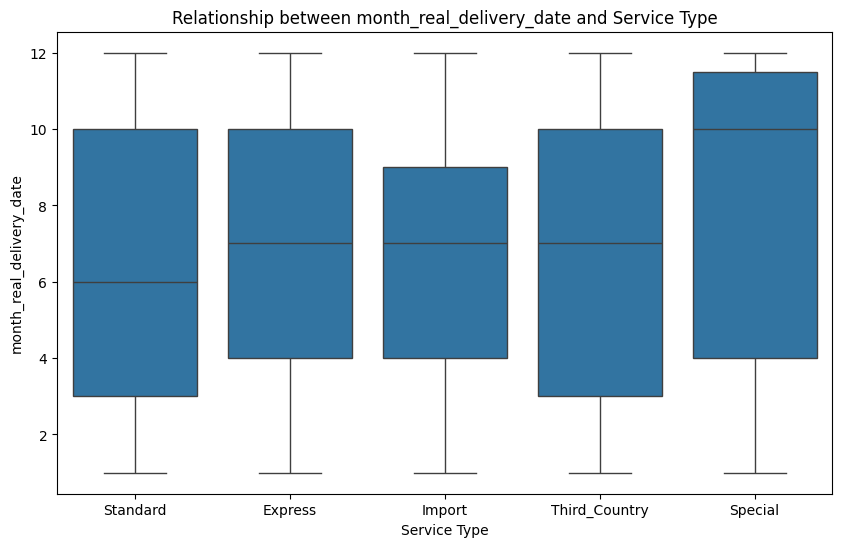

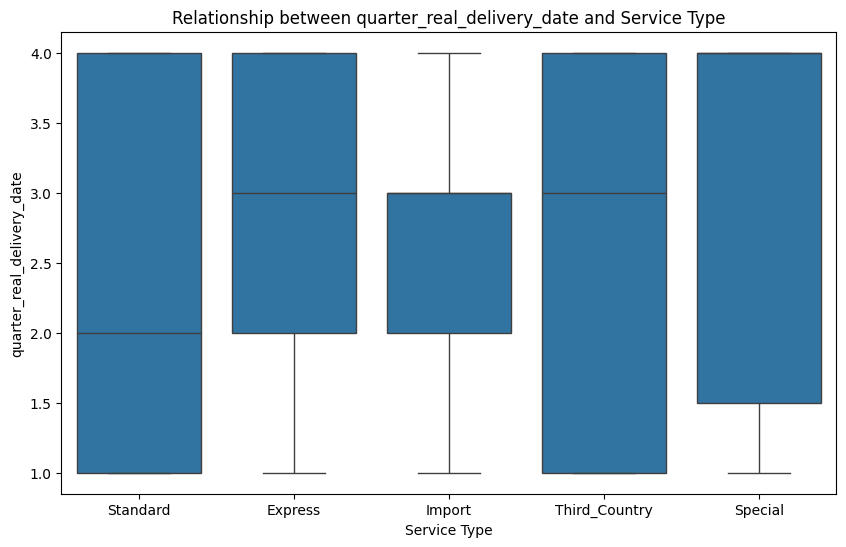

In [ ]:
# Box plots to see how numerical features relate to the target variable
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['service_type'], y=df[feature])
    plt.title(f"Relationship between {feature} and Service Type")
    plt.xlabel("Service Type")
    plt.ylabel(feature)
    plt.show()

# Preprocessing

## Removing unavailable columns at the moment of the prediction

In [8]:
columns_to_exclude = [
    'created_date_delivery', 'full_date_delivery_date', 'year_delivery_date', 'month_delivery_date',
    'quarter_delivery_date', 'full_date_real_delivery_date', 'year_real_delivery_date',
    'month_real_delivery_date', 'quarter_real_delivery_date',
    'final_carrier_price', 'created_date_carrier',
    'delivery_postal_code', 'delivery_city',
    'margin', 'lms_plus',
    'full_date_pickup_date', 'year_pickup_date', 'month_pickup_date', 'quarter_pickup_date',
    'full_date_real_pickup_date', 'year_real_pickup_date', 'month_real_pickup_date', 'quarter_real_pickup_date',
    'pickup_postal_code', 'pickup_city',
    'created_date_service', 'domain_name_service', 'service_name',
    'carrier_name',
    'segmentation', 'domain_name_customer',
    'transport_type', 'sequence_number', 'shipment_id', 'structure_number'
]


In [9]:
# Drop the identified columns to prevent label leakage
df = df.drop(columns=columns_to_exclude, axis=1)

## Handling missing values

In [ ]:
# columns with NAs (with more than 0)
df.isna().sum()[df.isna().sum() > 0]

main_industry                      199023
all_industries                     199023
root_branch_id                     199023
name_pickup                         27321
iso_country_code_pickup             27341
continent_pickup                    27321
EU_pickup                           27321
name_pickup_country                 27321
iso_country_code_pickup_country     27341
continent_pickup_country            27321
EU_pickup_country                   27321
dtype: int64

In [10]:
# Drop columns with too many missing values (more than 70% missing)
threshold = len(df) * 0.7
df = df.dropna(axis=1, thresh=threshold)

# Fill numeric columns with median and categorical columns with 'missing'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[categorical_cols] = df[categorical_cols].fillna('missing')

## Feature selection

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Encode Categorical Target
target_column = 'service_type'
le_target = LabelEncoder()
df[target_column] = le_target.fit_transform(df[target_column])

In [12]:
# Split Features and Target
X = df.drop([target_column], axis=1)
y = df[target_column]

In [13]:
# Encoding Strategy for Features
# Split categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Apply Encoding to Categorical Features
# Label Encoding for high-cardinality features, One-Hot Encoding for low-cardinality features
for col in categorical_cols:
    if X[col].nunique() > 10:  # High cardinality threshold (e.g., >10 unique values)
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
    else:
        X = pd.get_dummies(X, columns=[col], drop_first=True)

In [14]:
# Train-Test Split for Feature Selection Purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Feature Selection
# Train a RandomForestClassifier to determine feature importance
rf = RandomForestClassifier(n_estimators=50, random_state=42)  # Reduced number of estimators for simplicity
rf.fit(X_train, y_train)

# Get Feature Importances and Select Important Features
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.01].index.tolist()  # Adjust threshold as needed

# Create Final Dataset with Selected Features
X_selected_train = X_train[important_features]
X_selected_test = X_test[important_features]

# Output the Selected Features
print("Selected Features:", important_features)

Selected Features: ['customer_price', 'expected_carrier_price', 'weight', 'customer_id', 'created_date', 'name_pickup', 'iso_country_code_pickup', 'created_date_pickup', 'name_pickup_country', 'iso_country_code_pickup_country', 'full_date_created_date', 'month_created_date', 'shipment_type_Parcel', 'continent_pickup_Europe', 'continent_pickup_country_Europe']


## Feature scaling

In [15]:
# Identify numerical features from the selected features
numerical_cols_train = X_selected_train.select_dtypes(include=['int64', 'float64']).columns
numerical_cols_test = X_selected_test.select_dtypes(include=['int64', 'float64']).columns

# Apply Scaling to Numerical Columns
scaler = StandardScaler()

# Fit the scaler on the training set numerical features and transform both training and test set
X_selected_train[numerical_cols_train] = scaler.fit_transform(X_selected_train[numerical_cols_train])
X_selected_test[numerical_cols_test] = scaler.transform(X_selected_test[numerical_cols_test])

# Output to verify that scaling is done
print("Feature scaling applied to the following columns:", numerical_cols_train.tolist())

Feature scaling applied to the following columns: ['customer_price', 'expected_carrier_price', 'weight', 'customer_id', 'created_date', 'name_pickup', 'iso_country_code_pickup', 'created_date_pickup', 'name_pickup_country', 'iso_country_code_pickup_country', 'full_date_created_date', 'month_created_date']


<ipython-input-15-c8484967bca1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_train[numerical_cols_train] = scaler.fit_transform(X_selected_train[numerical_cols_train])
<ipython-input-15-c8484967bca1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_test[numerical_cols_test] = scaler.transform(X_selected_test[numerical_cols_test])


# Model Training & Evaluation

In [17]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of models to train
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced', multi_class='multinomial'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, scale_pos_weight=1)  # scale_pos_weight used to handle imbalance
}

# Prepare training and test data
X_train, X_test = X_selected_train, X_selected_test
y_train, y_test = y_train, y_test

# Initialize a dictionary to store the results
results = {}

# Train each model in a loop and evaluate its performance
for model_name, model in models.items():
    # Cross-Validation for Robust Evaluation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Predict probabilities if possible
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)
        # Check if it's a binary or multiclass problem
        if y_pred_prob.shape[1] == 2:  # Binary classification
            y_pred_prob = y_pred_prob[:, 1]
        else:  # Multiclass, calculate ROC AUC for all classes
            y_pred_prob = y_pred_prob
    else:
        y_pred_prob = None

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)

    # Calculate ROC AUC if possible
    if y_pred_prob is not None and len(set(y_test)) == 2:
        # Binary ROC AUC
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic for {model_name}')
        plt.legend(loc='lower right')
        plt.show()
    elif y_pred_prob is not None and len(set(y_test)) > 2:
        # Multiclass ROC AUC
        roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
        print(f"Multiclass ROC AUC: {roc_auc:.4f}")
    else:
        roc_auc = None

    # Store the results for comparison
    results[model_name] = {
        "Accuracy": accuracy,
        "Cross-Validation Accuracy": cv_scores.mean(),
        "Cross-Validation Std Dev": cv_scores.std(),
        "Classification Report": class_report,
        "Confusion Matrix": confusion,
        "ROC AUC": roc_auc
    }

    # Print the performance metrics for the model
    print(f"\nModel: {model_name}")
    print(f"Test Set Accuracy: {accuracy:.4f}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion)
    print("\n" + "="*60 + "\n")

# Compare results across models
# Convert the metrics to a DataFrame for easier visualization
comparison_data = []
for model_name, metrics in results.items():
    comparison_data.append([
        model_name,
        metrics["Accuracy"],
        metrics["Cross-Validation Accuracy"],
        metrics["Cross-Validation Std Dev"],
        metrics["ROC AUC"]
    ])

comparison_df = pd.DataFrame(comparison_data, columns=["Model", "Accuracy", "Cross-Validation Accuracy", "Cross-Validation Std Dev", "ROC AUC"])

print("Comparison of Model Performance:")
print(comparison_df)

Random Forest Cross-Validation Accuracy: 0.9255 (+/- 0.0011)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Multiclass ROC AUC: 0.9281

Model: Random Forest
Test Set Accuracy: 0.9297
ROC AUC: 0.9281
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.90      0.96      0.93     59994
           1       0.89      0.65      0.75      3624
           2       0.00      0.00      0.00         2
           3       0.97      0.92      0.94     67694
           4       1.00      0.32      0.48        47

    accuracy                           0.93    131361
   macro avg       0.75      0.57      0.62    131361
weighted avg       0.93      0.93      0.93    131361

Confusion Matrix:
[[57682   209     0  2103     0]
 [ 1161  2356     0   107     0]
 [    2     0     0     0     0]
 [ 5540    79     0 62075     0]
 [   32     0     0     0    15]]




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Logistic Regression Cross-Validation Accuracy: 0.6003 (+/- 0.0061)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Multiclass ROC AUC: 0.7530

Model: Logistic Regression
Test Set Accuracy: 0.5962
ROC AUC: 0.7530
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.32      0.45     59994
           1       0.17      0.63      0.27      3624
           2       0.00      0.00      0.00         2
           3       0.67      0.84      0.75     67694
           4       0.01      0.81      0.02        47

    accuracy                           0.60    131361
   macro avg       0.33      0.52      0.30    131361
weighted avg       0.70      0.60      0.60    131361

Confusion Matrix:
[[19247  7437  3244 26819  3247]
 [  329  2283   261   630   121]
 [    1     0     0     0     1]
 [ 5416  3537  1645 56743   353]
 [    0     5     3     1    38]]




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:47:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning

XGBoost Cross-Validation Accuracy: 0.9029 (+/- 0.0017)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:50:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and 

Multiclass ROC AUC: 0.9488

Model: XGBoost
Test Set Accuracy: 0.9023
ROC AUC: 0.9488
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.86      0.94      0.90     59994
           1       0.83      0.60      0.69      3624
           2       0.00      0.00      0.00         2
           3       0.95      0.89      0.92     67694
           4       0.64      0.34      0.44        47

    accuracy                           0.90    131361
   macro avg       0.66      0.55      0.59    131361
weighted avg       0.90      0.90      0.90    131361

Confusion Matrix:
[[56285   359     0  3345     5]
 [ 1358  2159     0   106     1]
 [    2     0     0     0     0]
 [ 7532    94     0 60065     3]
 [   31     0     0     0    16]]


Comparison of Model Performance:
                 Model  Accuracy  Cross-Validation Accuracy  \
0        Random Forest  0.929713                   0.925544   
1  Logistic Regression  0.596151                   0.600317   
2              XGBoost  0.902285                   0.902923   

   Cross-Validation Std Dev   ROC AUC  

In [18]:
# Compare results across models
# Convert the metrics to a DataFrame for easier visualization
comparison_data = []
for model_name, metrics in results.items():
    comparison_data.append([
        model_name,
        metrics["Accuracy"],
        metrics["Cross-Validation Accuracy"],
        metrics["Cross-Validation Std Dev"],
        metrics["ROC AUC"]
    ])

comparison_df = pd.DataFrame(comparison_data, columns=["Model", "Accuracy", "Cross-Validation Accuracy", "Cross-Validation Std Dev", "ROC AUC"])

print("Comparison of Model Performance:")
print(comparison_df)

Comparison of Model Performance:
                 Model  Accuracy  Cross-Validation Accuracy  \
0        Random Forest  0.929713                   0.925544   
1  Logistic Regression  0.596151                   0.600317   
2              XGBoost  0.902285                   0.902923   

   Cross-Validation Std Dev   ROC AUC  
0                  0.001091  0.928086  
1                  0.006064  0.753015  
2                  0.001702  0.948821  


## Hyperparameter Tuning for XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import xgboost as xgb

# Define the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, scale_pos_weight=1)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Use GridSearchCV to search for the best combination of hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_selected_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters from Grid Search:", best_params)
print("Best Cross-Validation Accuracy from Grid Search:", best_score)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


In [ ]:
# Train the XGBoost model using the best parameters
best_xgb_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss', random_state=42, scale_pos_weight=1)
best_xgb_model.fit(X_selected_train, y_train)

# Make predictions on the test set
y_pred_best = best_xgb_model.predict(X_selected_test)

# Evaluate the tuned model's performance
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_report_best = classification_report(y_test, y_pred_best)
confusion_matrix_best = confusion_matrix(y_test, y_pred_best)

print(f"Test Set Accuracy (Tuned XGBoost): {accuracy_best:.4f}")
print("Classification Report (Tuned XGBoost):")
print(classification_report_best)
print("Confusion Matrix (Tuned XGBoost):")
print(confusion_matrix_best)

# Analysis of Results

In [ ]:
# Print the tuned model's performance metrics
print(f"Test Set Accuracy (Tuned XGBoost): {accuracy_best:.4f}")
print("Classification Report (Tuned XGBoost):")
print(classification_report_best)
print("Confusion Matrix (Tuned XGBoost):")
print(confusion_matrix_best)

# Visualize the confusion matrix to understand misclassifications
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix_best, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix of Tuned XGBoost Model")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

## Feature Importance

In [ ]:
# Extract feature importances from the best XGBoost model
importance = best_xgb_model.feature_importances_

# Create a DataFrame for easy visualization
importance_df = pd.DataFrame({'Feature': X_selected_train.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_df['Importance'][:10], y=importance_df['Feature'][:10], palette='viridis')
plt.title("Top 10 Feature Importances in Tuned XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("Top 10 Important Features:")
print(importance_df.head(10))